In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

import warnings

warnings.filterwarnings('ignore')

# This will suppress all DeprecationWarnings


ordinal_encoder = OrdinalEncoder()

country_label_encoder = LabelEncoder()
store_label_encoder = LabelEncoder()
product_label_encoder = LabelEncoder()


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

data = pd.read_csv("/kaggle/input/playground-series-s3e19/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e19/test.csv")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [4]:
test.head()

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


In [5]:
data.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [6]:
data['date'] = pd.to_datetime(data['date'])
test['date'] = pd.to_datetime(test['date'])

In [7]:
print(data['date'].min())
print(data['date'].max())

2017-01-01 00:00:00
2021-12-31 00:00:00


In [8]:
print(test['date'].min())
print(test['date'].max())

2022-01-01 00:00:00
2022-12-31 00:00:00


In [9]:
data['date'].value_counts()

2017-01-01    75
2020-05-11    75
2020-05-09    75
2020-05-08    75
2020-05-07    75
              ..
2018-08-29    75
2018-08-28    75
2018-08-27    75
2018-08-26    75
2021-12-31    75
Name: date, Length: 1826, dtype: int64

In [10]:
data[data['date'] == '2017-01-01'][data['product'] == 'Using LLMs to Improve Your Coding']

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
5,5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88
10,10,2017-01-01,Argentina,Kagglazon,Using LLMs to Improve Your Coding,340
15,15,2017-01-01,Canada,Kaggle Learn,Using LLMs to Improve Your Coding,202
20,20,2017-01-01,Canada,Kaggle Store,Using LLMs to Improve Your Coding,274
25,25,2017-01-01,Canada,Kagglazon,Using LLMs to Improve Your Coding,1041
30,30,2017-01-01,Estonia,Kaggle Learn,Using LLMs to Improve Your Coding,92
35,35,2017-01-01,Estonia,Kaggle Store,Using LLMs to Improve Your Coding,132
40,40,2017-01-01,Estonia,Kagglazon,Using LLMs to Improve Your Coding,501
45,45,2017-01-01,Japan,Kaggle Learn,Using LLMs to Improve Your Coding,167


In [11]:
countries = sorted(list(set(data['country'])))
products = sorted(list(set(data['product'])))
stores = sorted(list(set(data['store'])))

<Axes: >

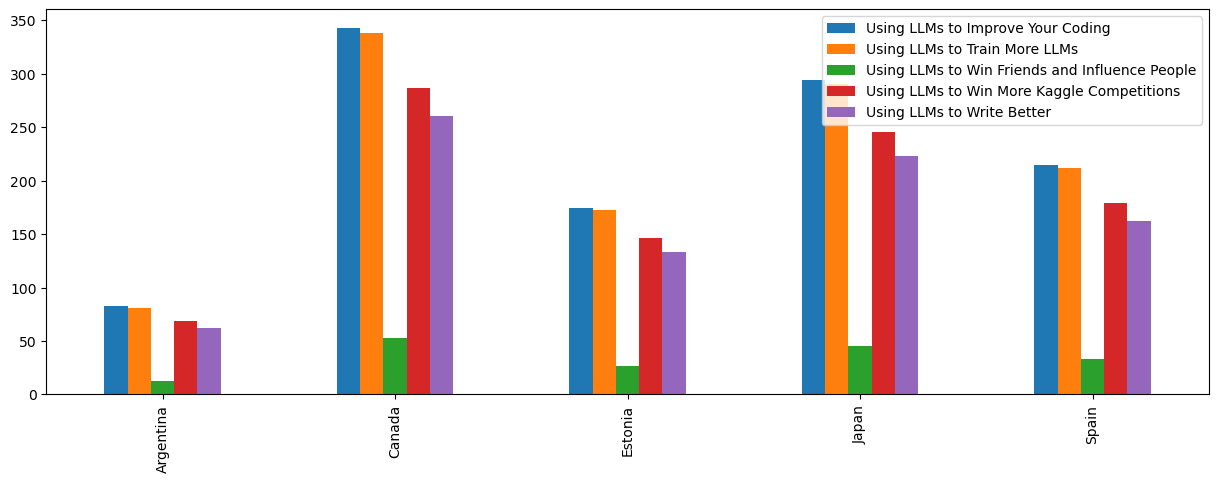

In [12]:
col = 'country'
res = pd.DataFrame(data[[col,'product','num_sold']].groupby([col,'product']).mean().values.reshape(len(countries),len(products)), columns=products).set_index([countries])
fig, ax = plt.subplots(figsize=(15, 5))
res.plot(kind='bar', ax=ax)

# from above grapah we can conclude that, for each country product sales is different

<Axes: >

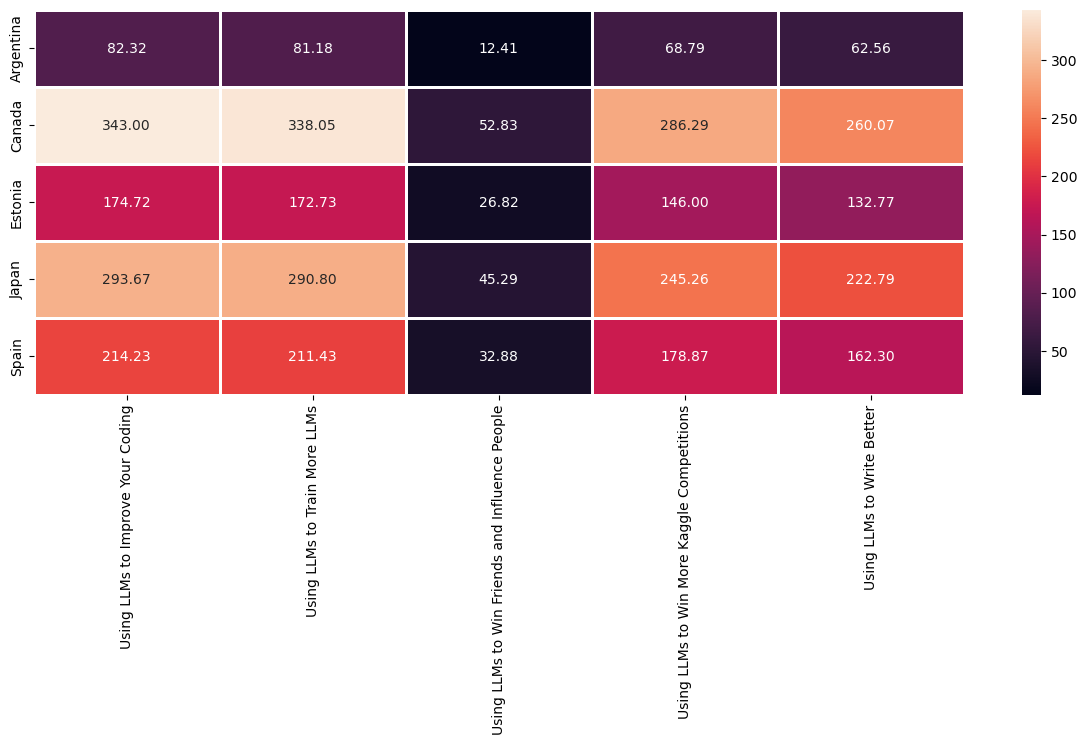

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(res, annot=True, fmt='.2f', linewidth=1)

# from above grapah it is clearly evedent that canada using the products the most and then Japan

<Axes: >

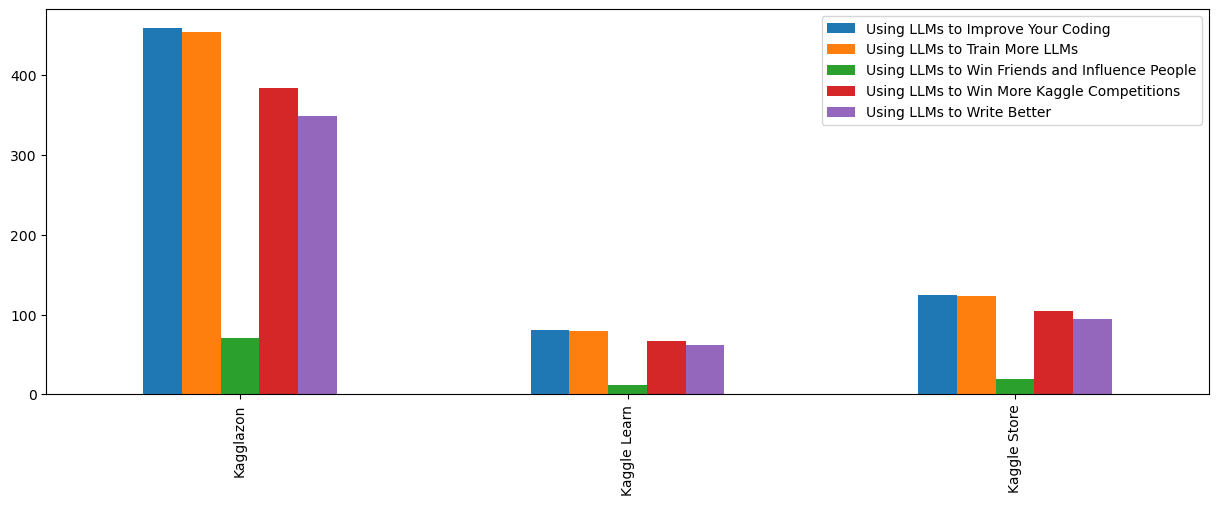

In [14]:
col = 'store'
res = pd.DataFrame(data[[col,'product','num_sold']].groupby([col,'product']).mean().values.reshape(len(stores),len(products)), columns=products).set_index([stores])
fig, ax = plt.subplots(figsize=(15, 5))
res.plot(kind='bar', ax=ax)

# Product sales in each store is different

<Axes: >

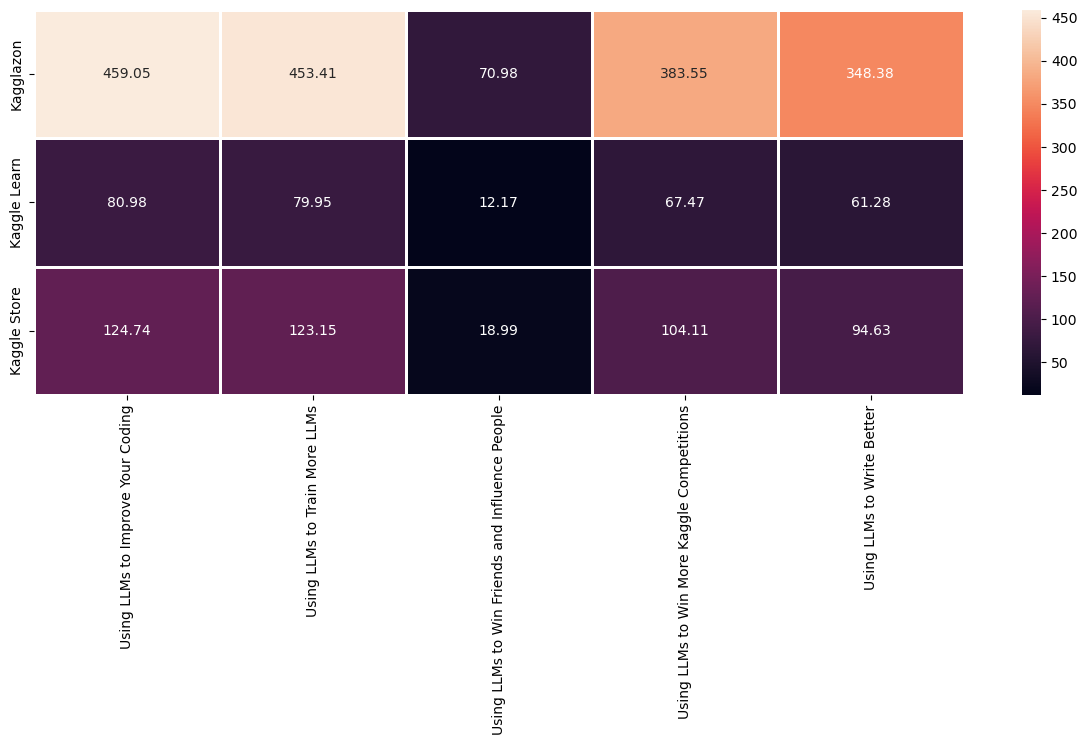

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(res, annot=True, fmt='.2f', linewidth=1)

# Kagglazon store has the highest sales accross each product

Kaggle Learn    45650
Kaggle Store    45650
Kagglazon       45650
Name: store, dtype: int64


<Axes: >

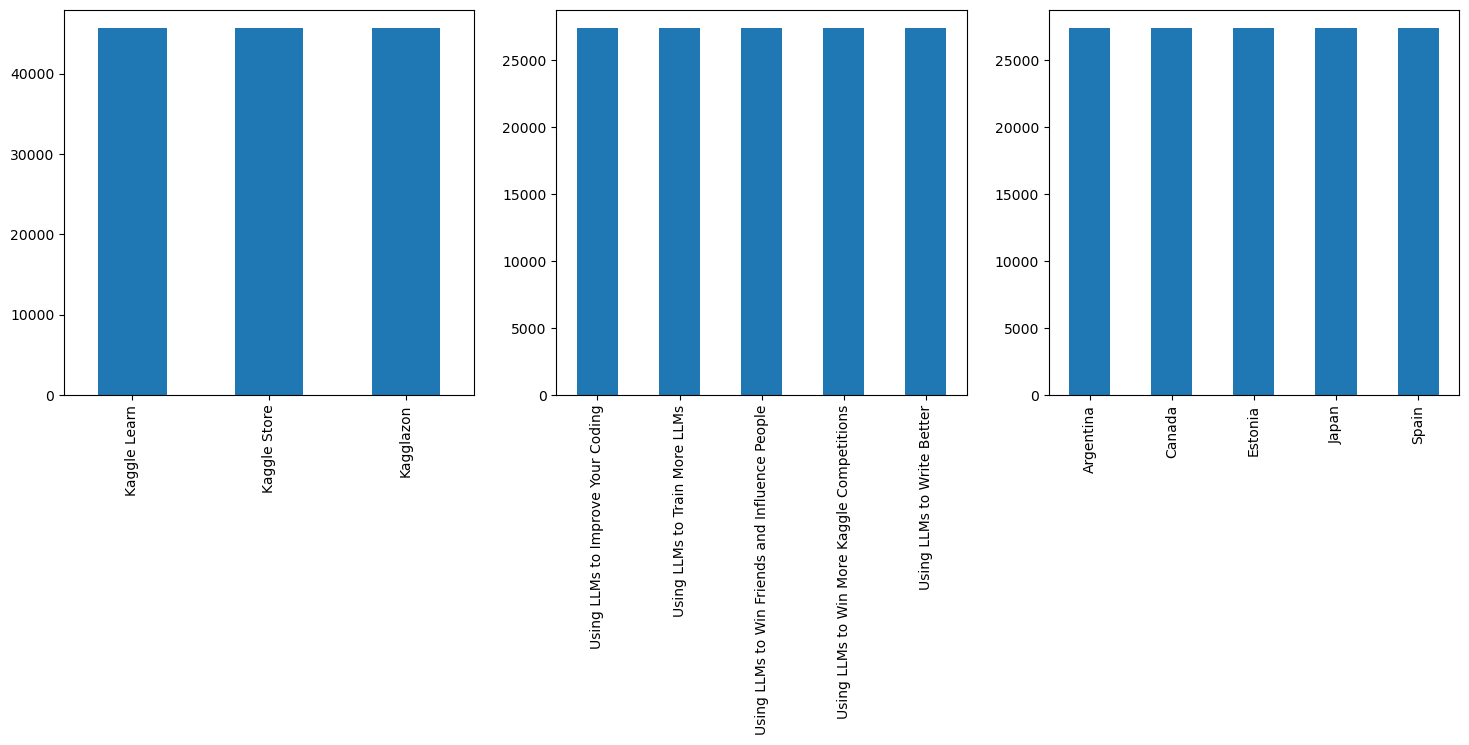

In [16]:
print(data['store'].value_counts())
fig,ax = plt.subplots(1,3, figsize=(18,5))
data['store'].value_counts().plot(kind='bar', ax=ax[0])
data['product'].value_counts().plot(kind='bar', ax=ax[1])
data['country'].value_counts().plot(kind='bar', ax=ax[2])

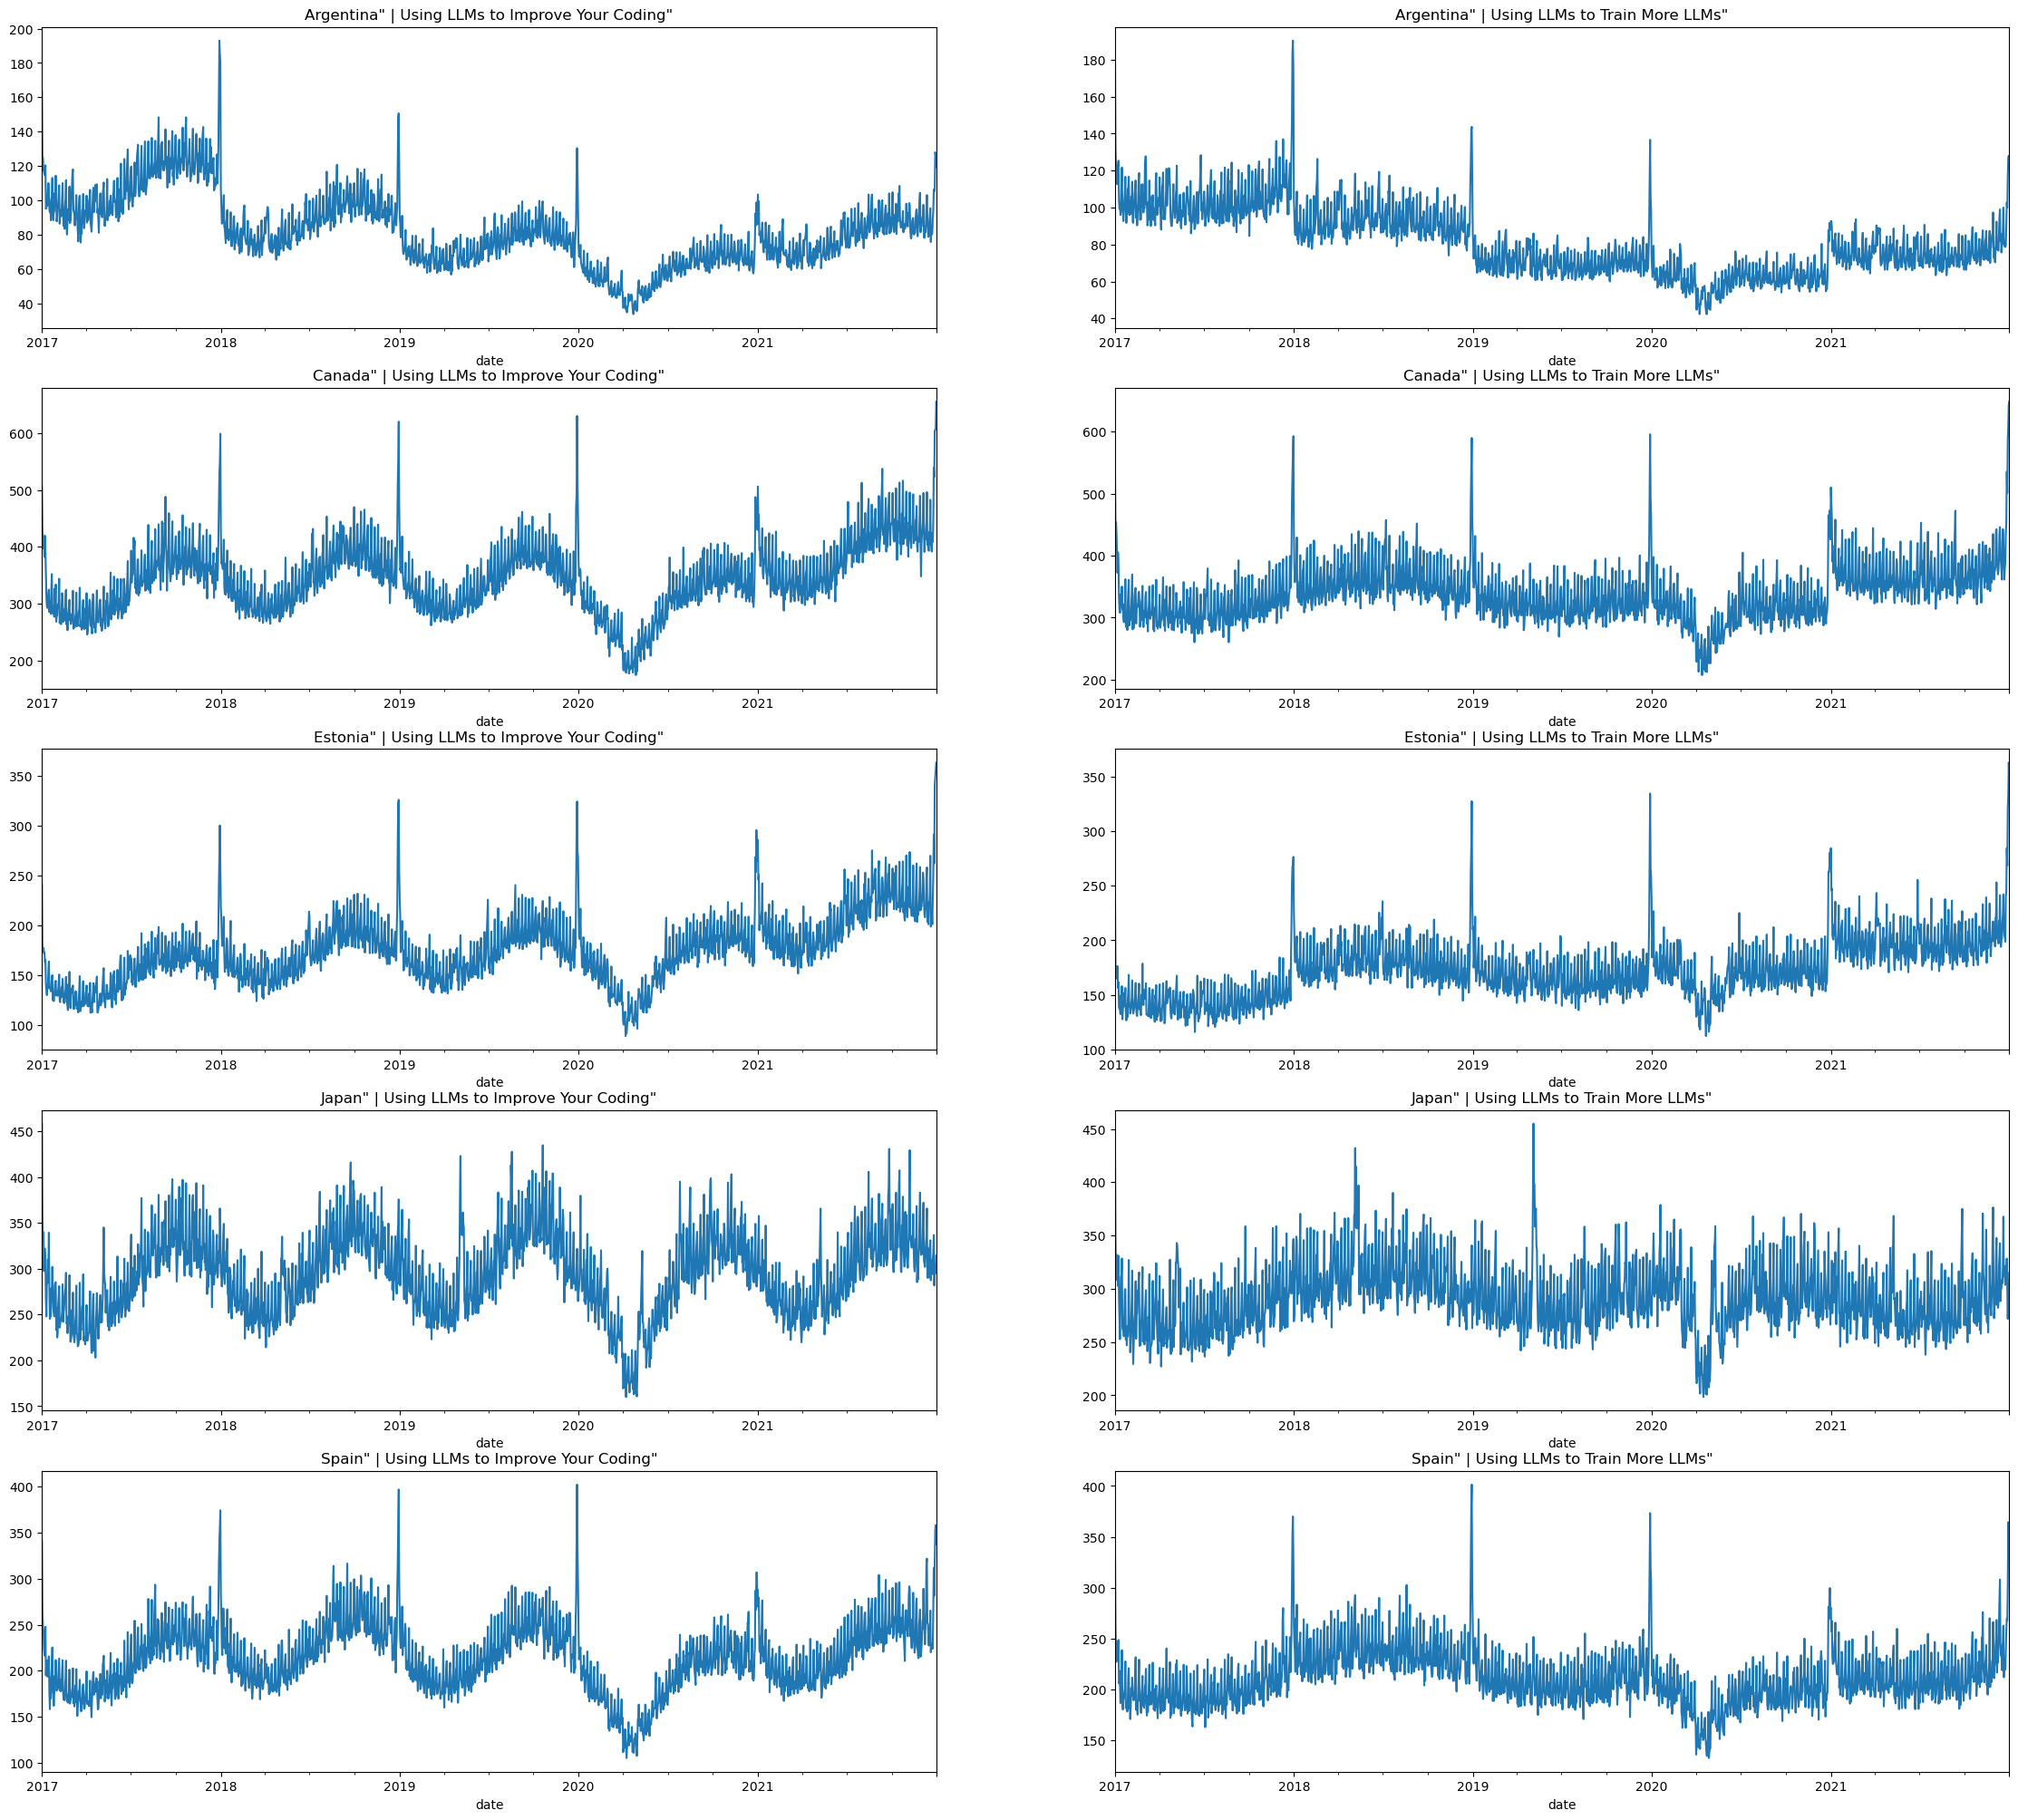

In [17]:
fig,ax = plt.subplots(len(countries),2, figsize=(28,25))
i=0
for c in countries:
    j=0
    for p in products[:2]:
        df = data[(data['country'] == c) & (data['product'] == p)][['date','num_sold']].groupby('date').mean()
        df['num_sold'].plot(ax=ax[i,j])
        ax[i,j].set_title(f'{c}" | {p}"')
        #sns.lineplot(x=df['date'],y=df['num_sold'] ,linewidth=1,ci=None,ax=ax)
        j=j+1
    i=i+1
            
plt.show()

# In above graph, we can clearly observe yearly pattern in selling. To be clear, i have again plotted few products below from different stores. Note that year 2020 has little different selling behaviour. it might be because of covid situation

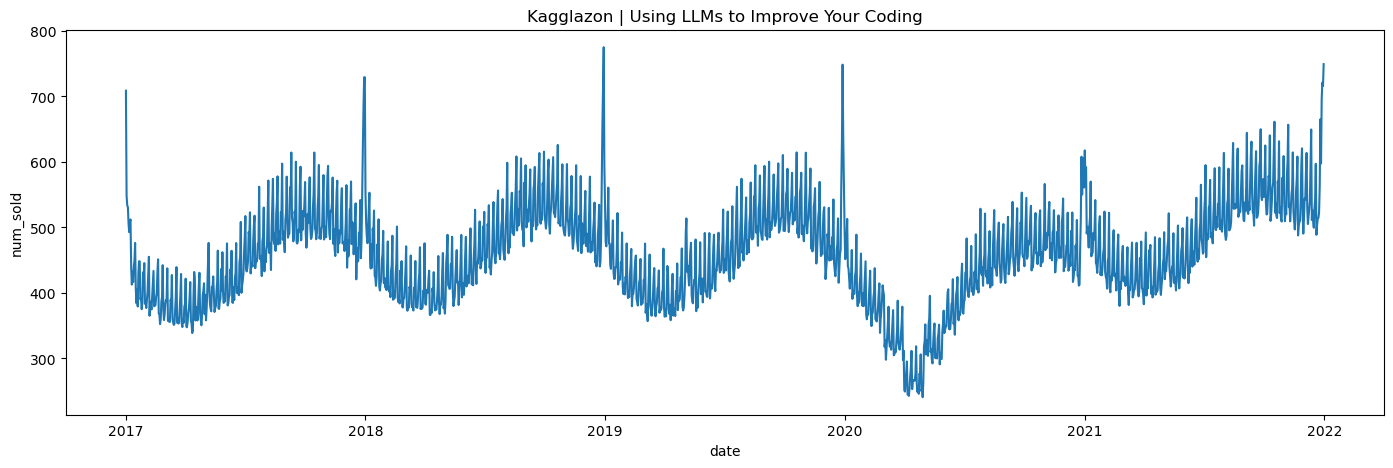

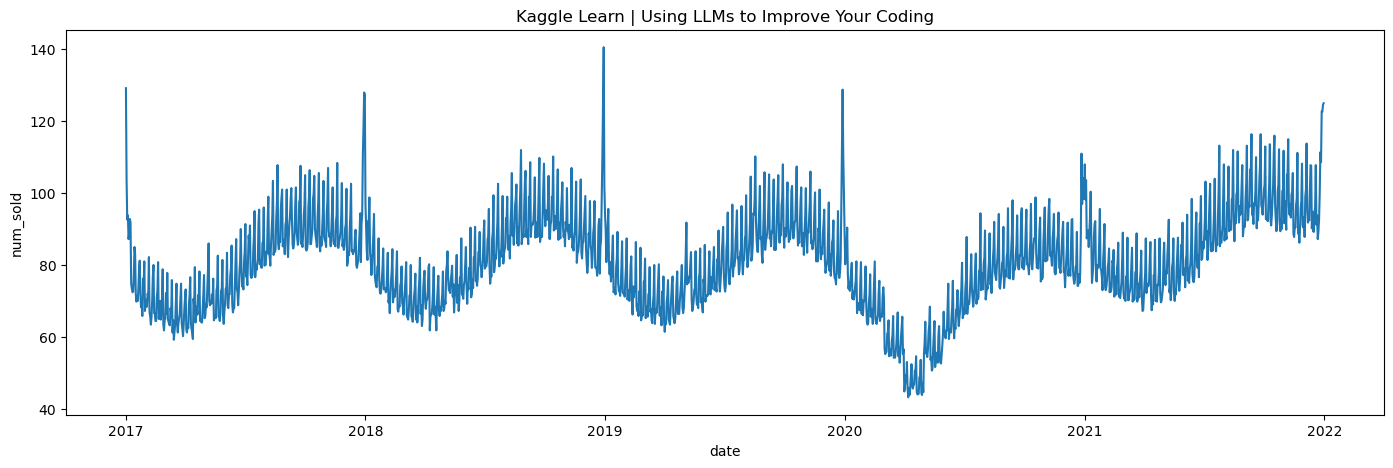

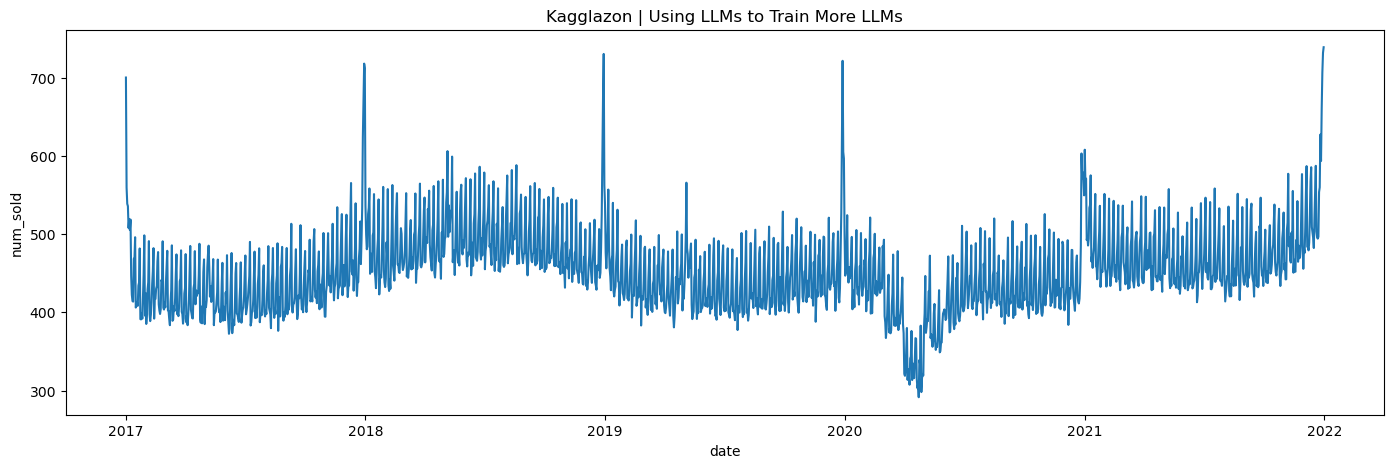

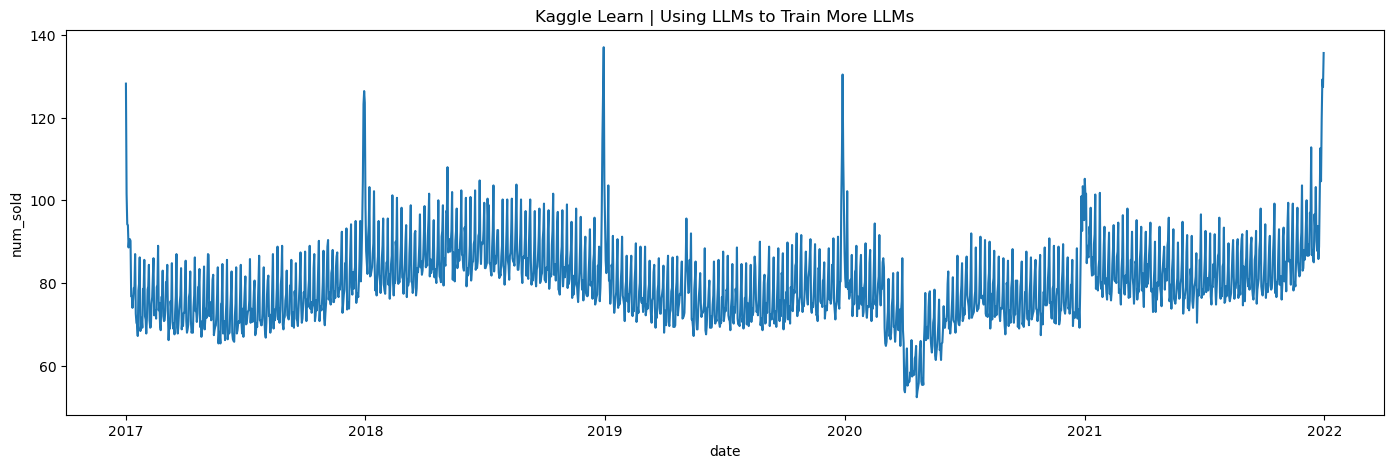

In [18]:
col = ['date','product','store','country','num_sold']
for product in products[:2]:
    for store in stores[:2]:
        plt.figure(figsize=(17,5))
        df = data[data['product'] == product][data['store'] == store][col].groupby('date').mean()
        sns.lineplot(x='date',y='num_sold',ci=None, data=df)
        plt.title(f"{store} | {product}")
        plt.show()

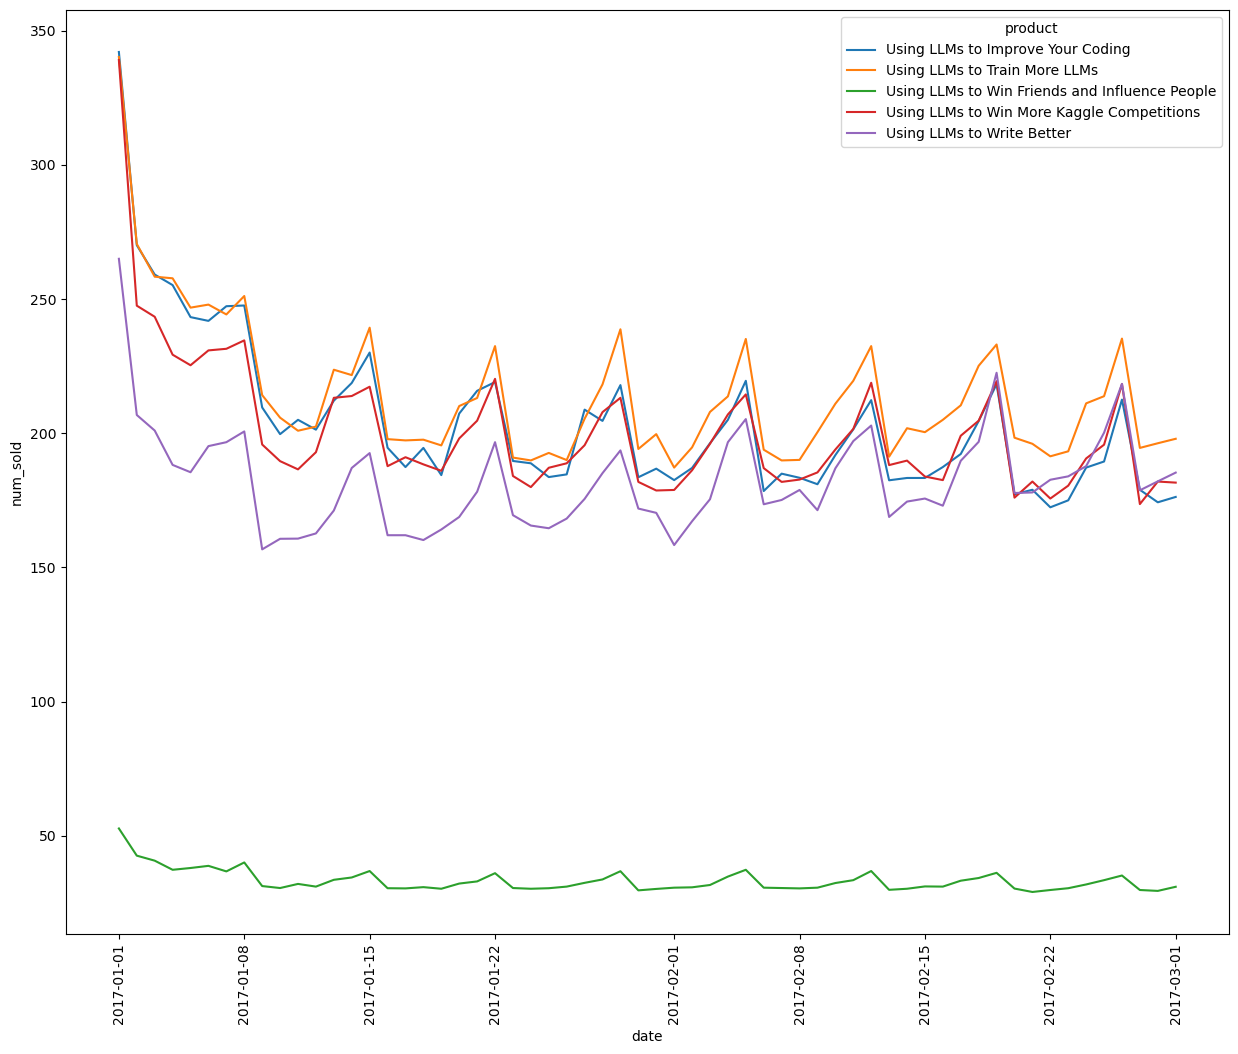

In [19]:
df = data.copy()
    
start = '2017-01-01'
end = '2017-03-01'

fig,ax = plt.subplots(figsize=(15,12))
temp_dff = df[['num_sold','date','product']][(df['date'] >= start) & (df['date'] <= end)].groupby(['date','product']).mean().reset_index()
#print(temp_dff)
sns.lineplot(x='date', y='num_sold', hue='product', data=temp_dff, ci=None)
plt.xticks(rotation=90)
plt.show()

# DATA Also shows weekly pattern. lets verify the same using PACF plot for a perticular product

# But before applying PACF, we will have to make data stationary if it is not already. We will use adfuller hypothesis testing to check if the data is stationary.

# with adfuller hypothesis test:
# H0:  Data is not stationary
# H1:  Data is stationary

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
int_data = data[(data['country']=='Argentina') & (data['store']=='Kaggle Learn') &  (data['product']=='Using LLMs to Improve Your Coding')]['num_sold']

adfuller(int_data)

(-1.661765270838378,
 0.45091194580391397,
 25,
 1800,
 {'1%': -3.4339881389288407,
  '5%': -2.863147035877915,
  '10%': -2.567625533641975},
 8380.006897141702)

# P-vlues(2nd element) is .45, which means, data is not stationary. Now to make it stationary, we will apply differencing

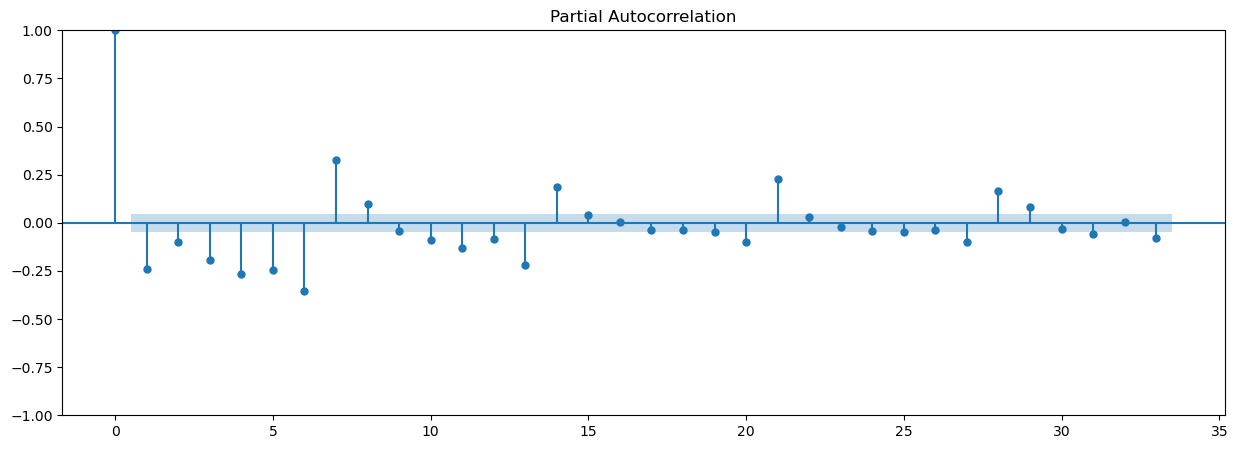

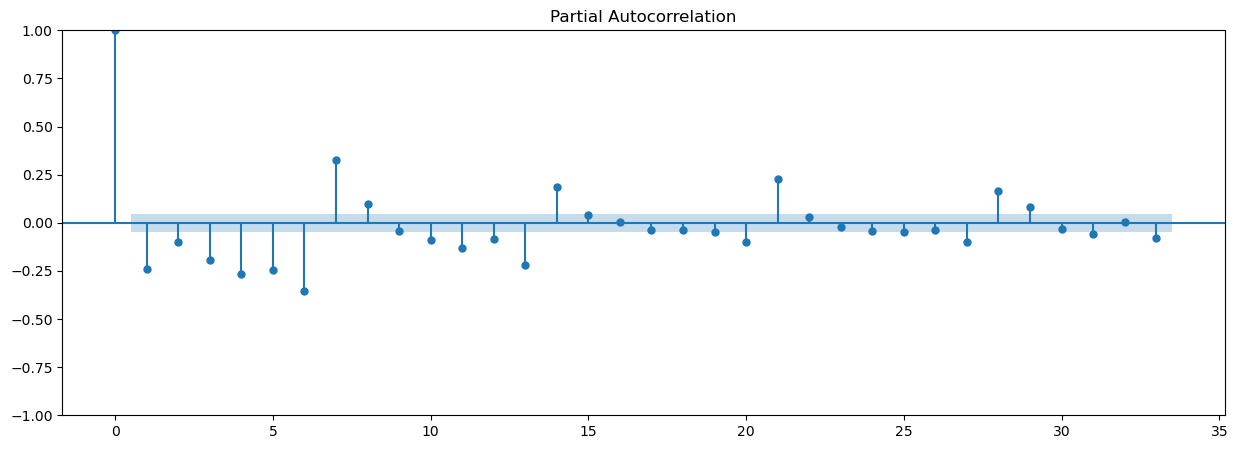

In [11]:
int_data = data[(data['country']=='Argentina') & (data['store']=='Kaggle Learn') &  (data['product']=='Using LLMs to Improve Your Coding')]['num_sold'].diff().dropna()
fig,ax = plt.subplots(figsize=(15,5))
plot_pacf(int_data, ax=ax)

# PACF semms to show that data has weekly pattern

# DATA PREPARATION AND MODEL BUILDING

# Below 2 functional are responsible for creating lag varibales in data

In [8]:
def create_lags(data, lags): 
    for i in range(lags):
        data['lag_{}'.format(i+1)] = data['num_sold'].shift(i+1)
    return data

In [9]:
countries = sorted(list(set(data['country'])))
products = sorted(list(set(data['product'])))
stores = sorted(list(set(data['store'])))


def clreate_lags_by_group(data, lags=7):
    cols = list(data.columns)
    for i in range(lags):
        cols.append('lag_{}'.format(i+1))
    final_data = pd.DataFrame(columns=cols)

    for country in countries:
        for product in products:
            for store in stores:
                temp = data[(data['country'] == country) & (data['store'] == store) & (data['product'] == product)]
                lagged_data = create_lags(temp, lags)            
                final_data = pd.concat([final_data,lagged_data], axis=0)
    return final_data

# Below function engineer few importent features that can help understanding the data in a better way

In [10]:
def prepare_data(data, train_flag=False, lag_flag=False):
    
    if 'date' in data.columns:
        data['date'] = pd.to_datetime(data['date'])
        
    df = data.copy()
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter
    df['week'] = df['date'].apply(lambda x: x.weekday())
    df['day'] = df['date'].dt.day

    date_string = '2020-01-01'
    covid_start_date = datetime.datetime.strptime(date_string, '%Y-%m-%d')
    df['covid_flag'] = df['date'] > covid_start_date
    df['covid_flag'] = df['covid_flag'].apply(int)
    
    
    if train_flag:
        df = df.drop(['id'], axis=1)
        country_label_encoder.fit(df['country'])
        store_label_encoder.fit(df['store'])
        product_label_encoder.fit(df['product'])
    
    df['country'] = country_label_encoder.transform(df['country'])
    df['store'] = store_label_encoder.transform(df['store'])
    df['product'] = product_label_encoder.transform(df['product'])
    
    df = df.sort_values('date')
    
    if 'date' in df.columns:
        df = df.set_index('date')
        
    return df.dropna()

# Below is time based train test split

In [11]:
def train_test_split(int_data, train_split=0.9):
    import datetime
    #train_lim = datetime.datetime.strptime('2020-01-01','%Y-%m-%d')
    train_lim = int(len(int_data)*train_split)
    train = int_data[:train_lim]
    test = int_data[train_lim:]
    
    train_x = train.drop(['num_sold'], axis=1)
    train_y = train['num_sold']
    test_x =  test.drop(['num_sold'], axis=1)
    test_y = test['num_sold']

    return (train_x, train_y, test_x, test_y)

# Preprocess Data

In [13]:
df = prepare_data(data, train_flag=True)

In [25]:
weeks = sorted(list(set(df['week'])))
months = sorted(list(set(df['month'])))
quarters = sorted(list(set(df['quarter'])))
years = sorted(list(set(df['year'])))

# Sales by each year and month is shown below

<Axes: >

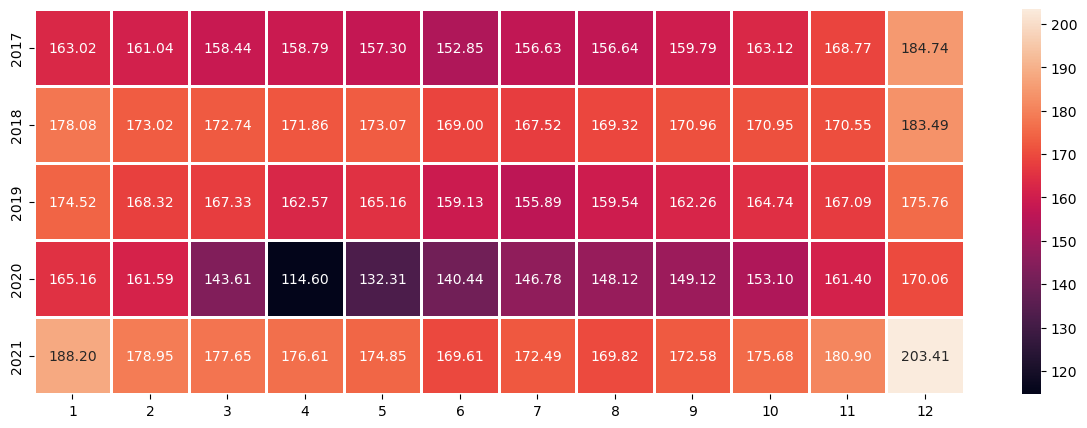

In [85]:
col = 'year'
res = pd.DataFrame(df[[col,'month','num_sold']].groupby([col,'month']).mean().values.reshape(len(years),len(months)), columns=months).set_index([years])
plt.figure(figsize=(15,5))
sns.heatmap(res, annot=True, fmt='.2f', linewidth=1)

# Product sales on different week-day

Text(0.5, 1.0, 'product sold by week')

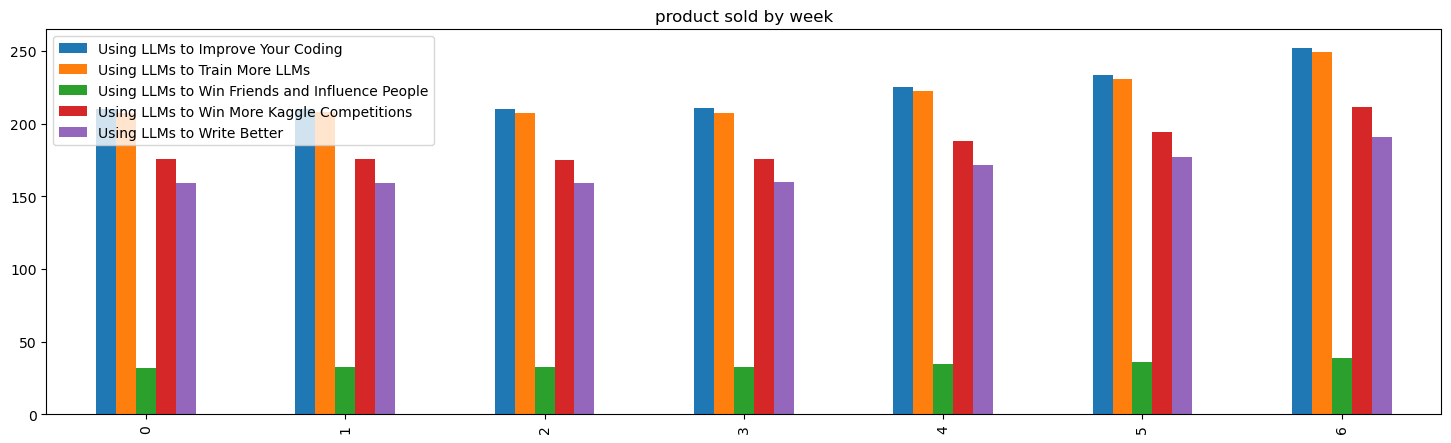

In [31]:
col = 'week'
res = pd.DataFrame(df[[col,'product','num_sold']].groupby([col,'product']).mean().values.reshape(len(weeks),len(products)), columns=products).set_index([weeks])
fig, ax = plt.subplots(figsize=(18, 5))
res.plot(kind='bar', ax=ax)
plt.title(f"product sold by {col}")

<Axes: >

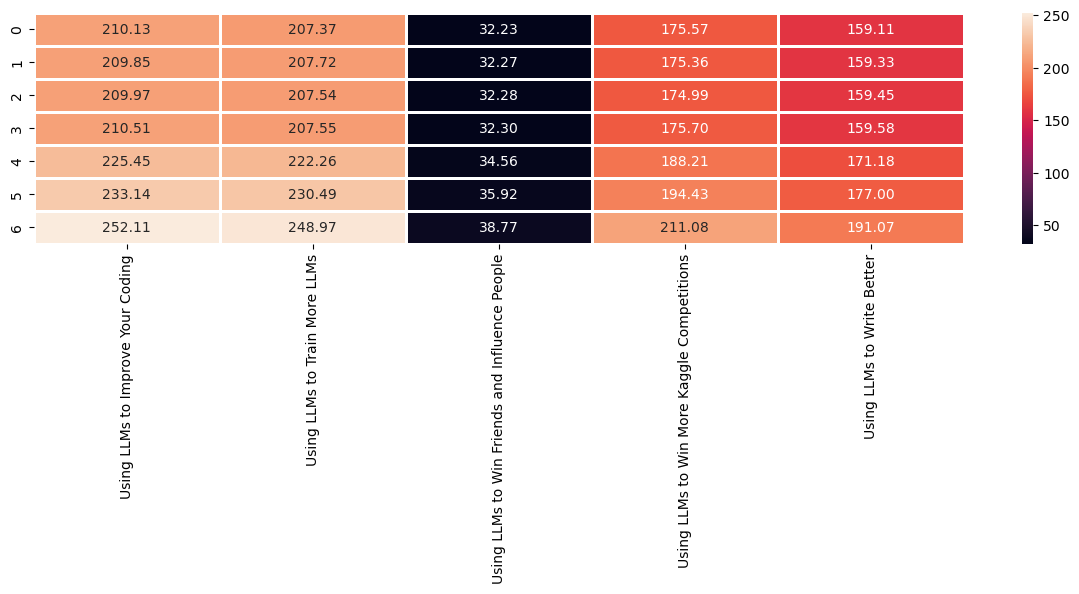

In [32]:
plt.figure(figsize=(15,3))
sns.heatmap(res, annot=True, fmt='.2f', linewidth=1)

# Above graph shows that weekday 6 has the highest sales

# product sales in each month is shown below

Text(0.5, 1.0, 'product sold by month')

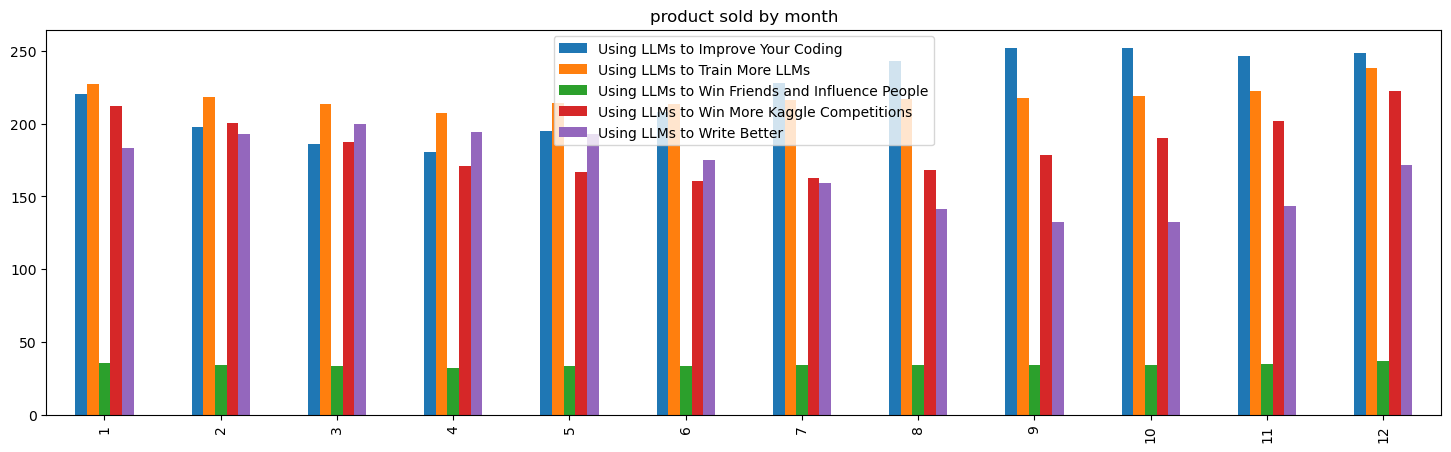

In [34]:
col = 'month'
res = pd.DataFrame(df[[col,'product','num_sold']].groupby([col,'product']).mean().values.reshape(len(months),len(products)), columns=products).set_index([months])
fig, ax = plt.subplots(figsize=(18, 5))
res.plot(kind='bar', ax=ax)
plt.title(f"product sold by {col}")

<Axes: >

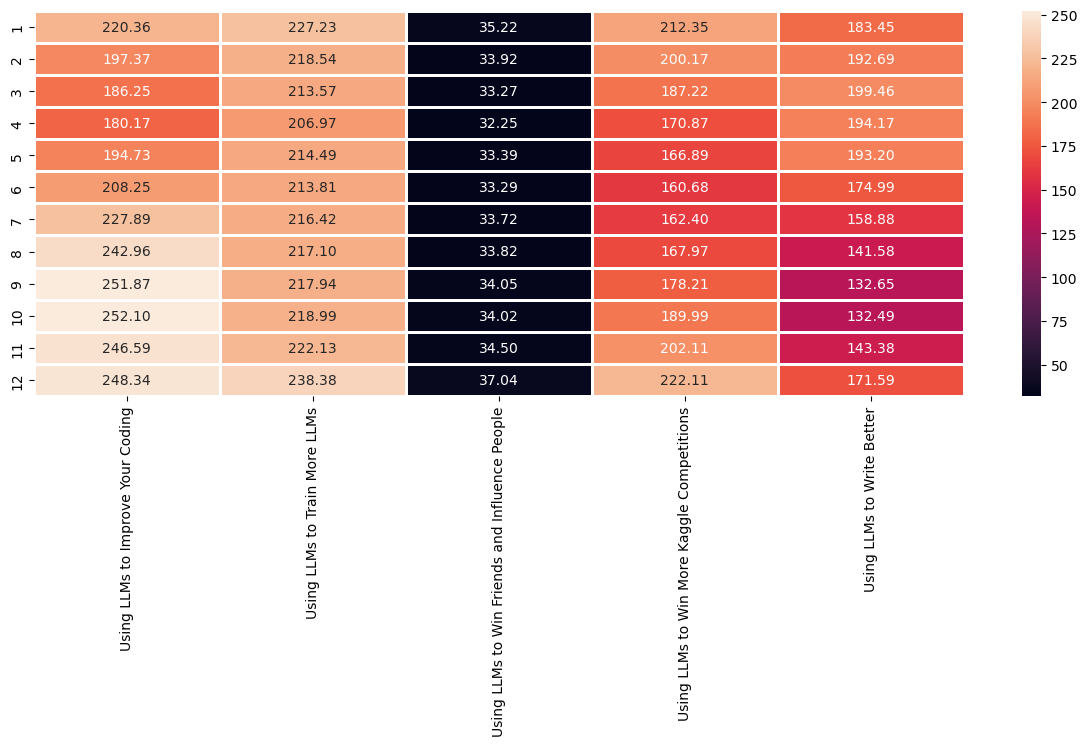

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(res, annot=True, fmt='.2f', linewidth=1)

# Product sales by quarter

Text(0.5, 1.0, 'product sold by quarter')

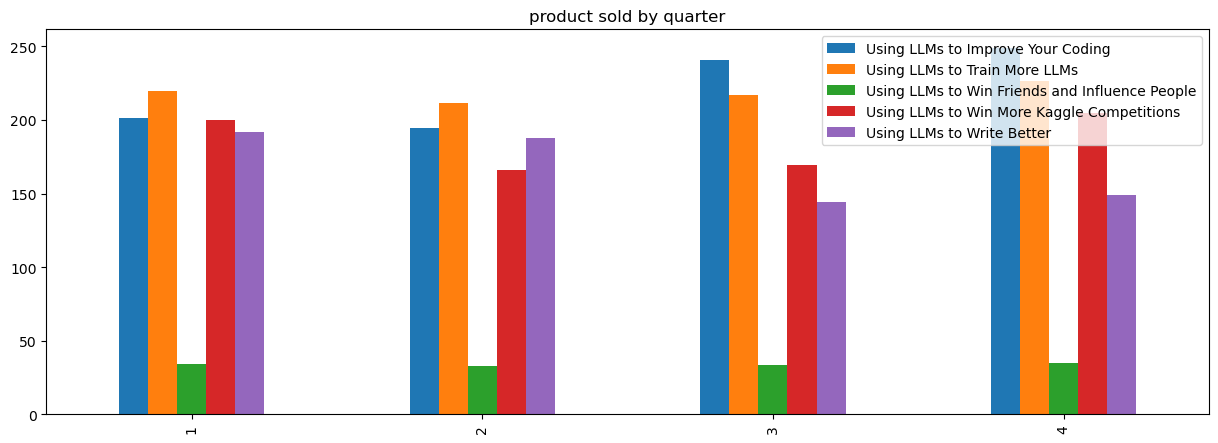

In [36]:
col = 'quarter'
res = pd.DataFrame(df[[col,'product','num_sold']].groupby([col,'product']).mean().values.reshape(len(quarters),len(products)), columns=products).set_index([quarters])
fig, ax = plt.subplots(figsize=(15, 5))
res.plot(kind='bar', ax=ax)
plt.title(f"product sold by {col}")

<Axes: >

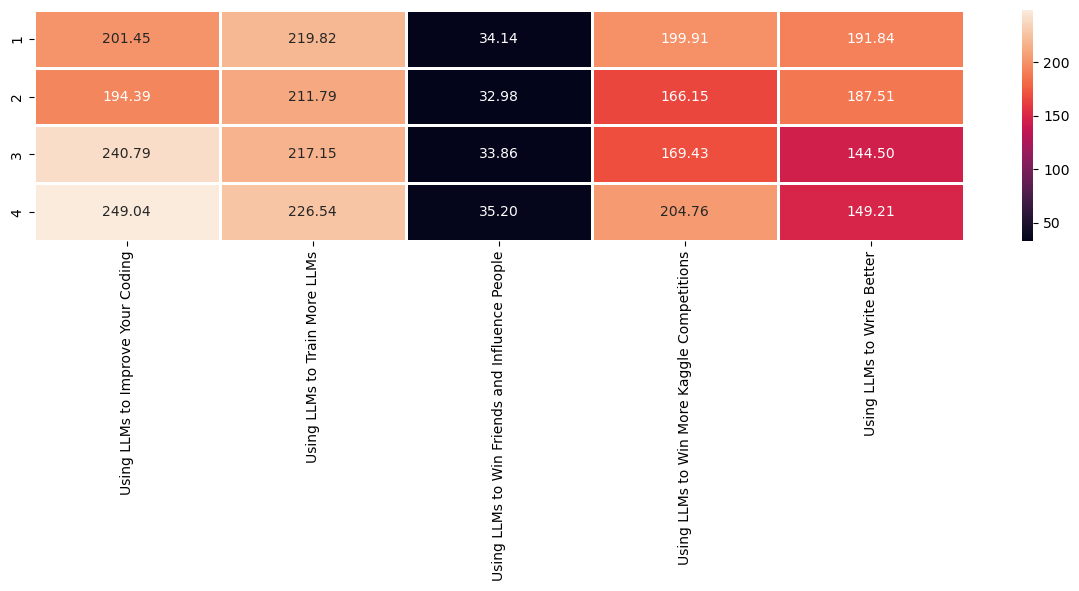

In [37]:
plt.figure(figsize=(15,3))
sns.heatmap(res, annot=True, fmt='.2f', linewidth=1)

# Product sales by Year

Text(0.5, 1.0, 'product sold by year')

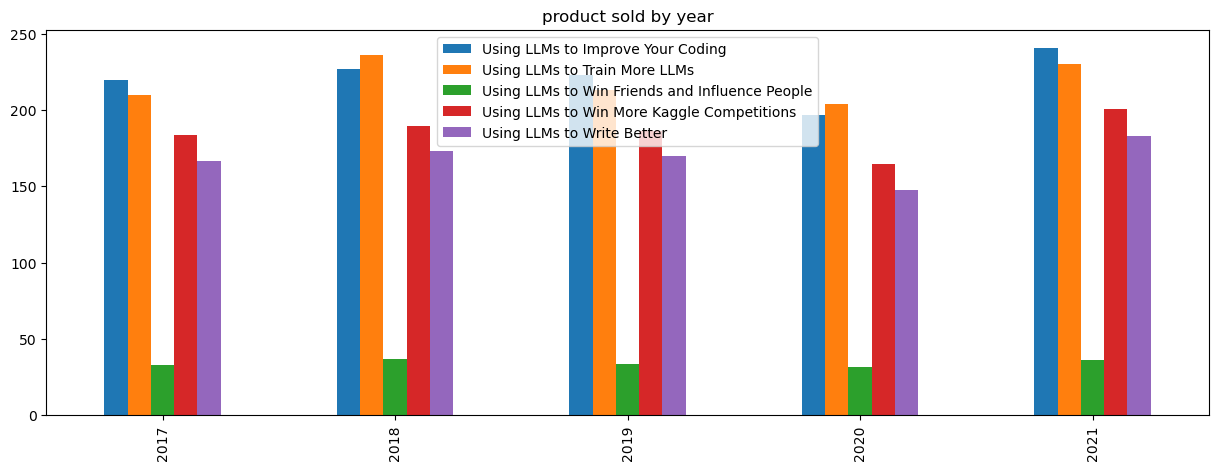

In [38]:
col = 'year'
res = pd.DataFrame(df[[col,'product','num_sold']].groupby([col,'product']).mean().values.reshape(len(years),len(products)), columns=products).set_index([years])
fig, ax = plt.subplots(figsize=(15, 5))
res.plot(kind='bar', ax=ax)
plt.title(f"product sold by {col}")

<Axes: >

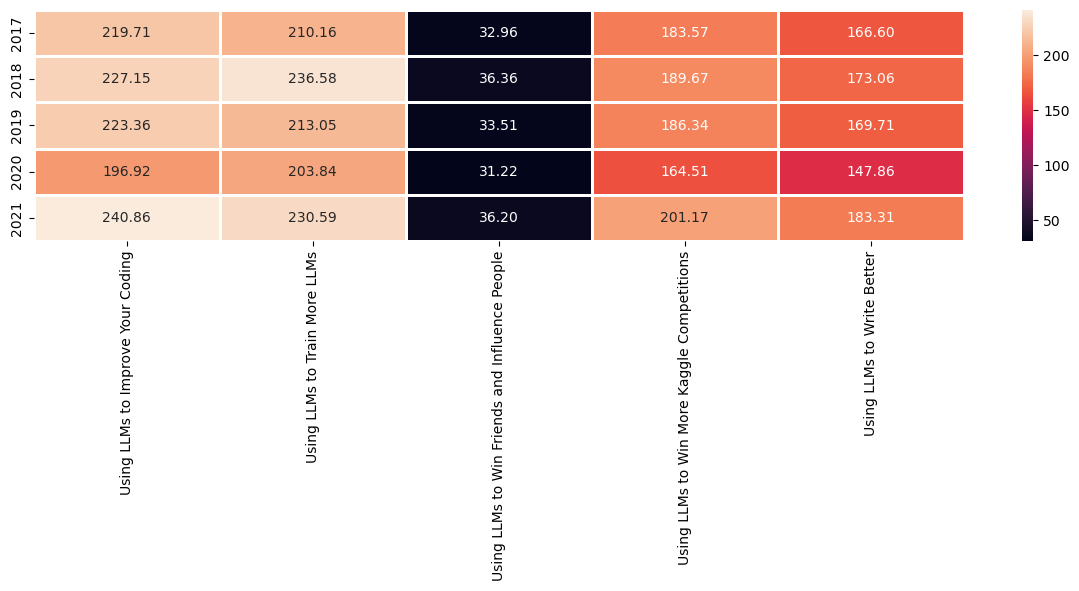

In [39]:
plt.figure(figsize=(15,3))
sns.heatmap(res, annot=True, fmt='.2f', linewidth=1)

# Get TRAIN TEST SPLIT

In [14]:
df = prepare_data(data, train_flag=True)
train_x, train_y, test_x, test_y = train_test_split(df)

In [41]:
train_x.head()

,country,store,product,year,month,quarter,week,day,covid_flag
date,,,,,,,,,
2017-01-01,0,1,0,2017,1,1,6,1,0
2017-01-01,3,2,4,2017,1,1,6,1,0
2017-01-01,3,2,3,2017,1,1,6,1,0
2017-01-01,3,2,2,2017,1,1,6,1,0
2017-01-01,3,2,1,2017,1,1,6,1,0


In [42]:
test_x.head()

,country,store,product,year,month,quarter,week,day,covid_flag
date,,,,,,,,,
2021-07-02,4,1,2,2021,7,3,4,2,1
2021-07-02,4,1,1,2021,7,3,4,2,1
2021-07-02,4,1,0,2021,7,3,4,2,1
2021-07-02,3,0,4,2021,7,3,4,2,1
2021-07-02,4,2,1,2021,7,3,4,2,1


# Try models with engineered features only(month, week, year, covid_flag etc), without any lag variables

In [43]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Create the XGBRegressor model
xgb_model = XGBRegressor()

# Fit the model to the data
xgb_model.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
y_pred = xgb_model.predict(test_x)
mse_value = mean_squared_error(y_pred, test_y)
res = pd.DataFrame(zip(map(int,y_pred),test_y.values), columns=["predicted", "truth"])
res['date'] = test_y.index
print(f"MSE: {mse_value}")
res.head(10)

MSE: 582.5770369588604


,predicted,truth,date
0,11,12,2021-07-02
1,77,75,2021-07-02
2,77,75,2021-07-02
3,503,525,2021-07-02
4,119,120,2021-07-02
5,93,94,2021-07-02
6,108,99,2021-07-02
7,17,18,2021-07-02
8,136,147,2021-07-02
9,124,132,2021-07-02


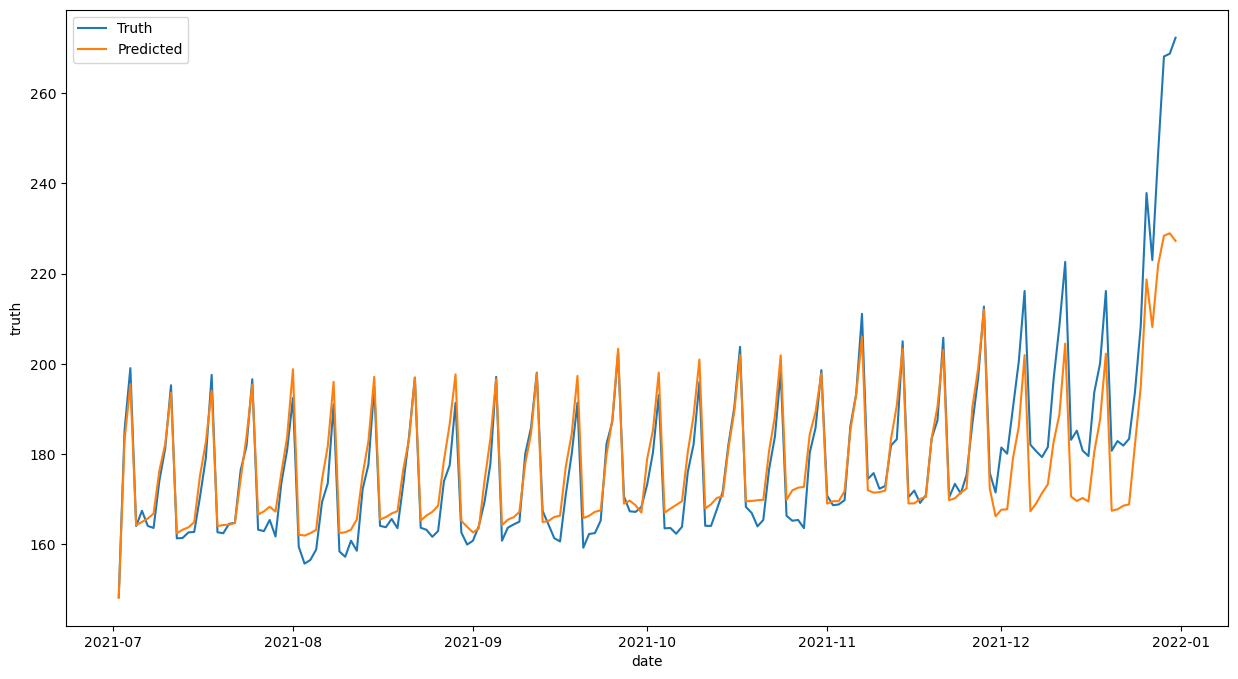

In [45]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='truth', data=res, ci=None, label='Truth')
sns.lineplot(x='date', y='predicted', data=res, ci=None, label='Predicted')
plt.legend()

In [46]:
from catboost import CatBoostRegressor
# Create the XGBRegressor model
cat_model = CatBoostRegressor(silent=True)

# Fit the model to the data
cat_model.fit(train_x, train_y)

In [47]:
y_pred = cat_model.predict(test_x)
mse_value = mean_squared_error(y_pred, test_y)
res = pd.DataFrame(zip(map(int,y_pred),test_y.values), columns=["predicted", "truth"])
res['date'] = test_y.index
print(f"MSE: {mse_value}")
res.head(10)

MSE: 524.2743941165523


,predicted,truth,date
0,12,12,2021-07-02
1,78,75,2021-07-02
2,82,75,2021-07-02
3,485,525,2021-07-02
4,121,120,2021-07-02
5,86,94,2021-07-02
6,106,99,2021-07-02
7,16,18,2021-07-02
8,152,147,2021-07-02
9,131,132,2021-07-02


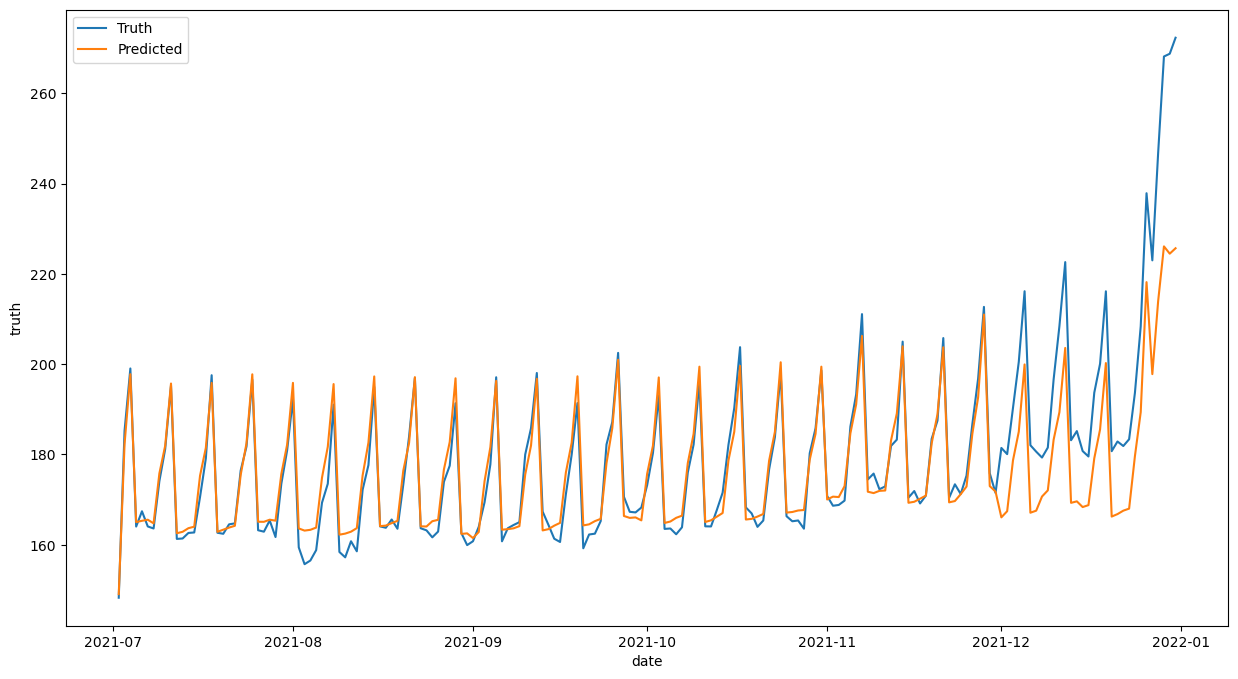

In [48]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='truth', data=res, ci=None, label='Truth')
sns.lineplot(x='date', y='predicted', data=res, ci=None, label='Predicted')
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(train_x, train_y)

y_pred = random_forest_model.predict(test_x)
mse_value = mean_squared_error(y_pred, test_y)
res = pd.DataFrame(zip(map(int,y_pred),test_y.values), columns=["predicted", "truth"])
res['date'] = test_y.index
print(f"MSE: {mse_value}")
res.head(10)


In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='truth', data=res, ci=None, label='Truth')
sns.lineplot(x='date', y='predicted', data=res, ci=None, label='Predicted')
plt.legend()

In [49]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(train_x, train_y)

y_pred = linear_model.predict(test_x)
mse_value = mean_squared_error(y_pred, test_y)
res = pd.DataFrame(zip(map(int,y_pred),test_y.values), columns=["predicted", "truth"])
res['date'] = test_y.index
print(f"MSE: {mse_value}")
res.head(10)

MSE: 27865.84749268421


,predicted,truth,date
0,198,12,2021-07-02
1,210,75,2021-07-02
2,223,75,2021-07-02
3,279,525,2021-07-02
4,87,120,2021-07-02
5,28,94,2021-07-02
6,194,99,2021-07-02
7,41,18,2021-07-02
8,175,147,2021-07-02
9,231,132,2021-07-02


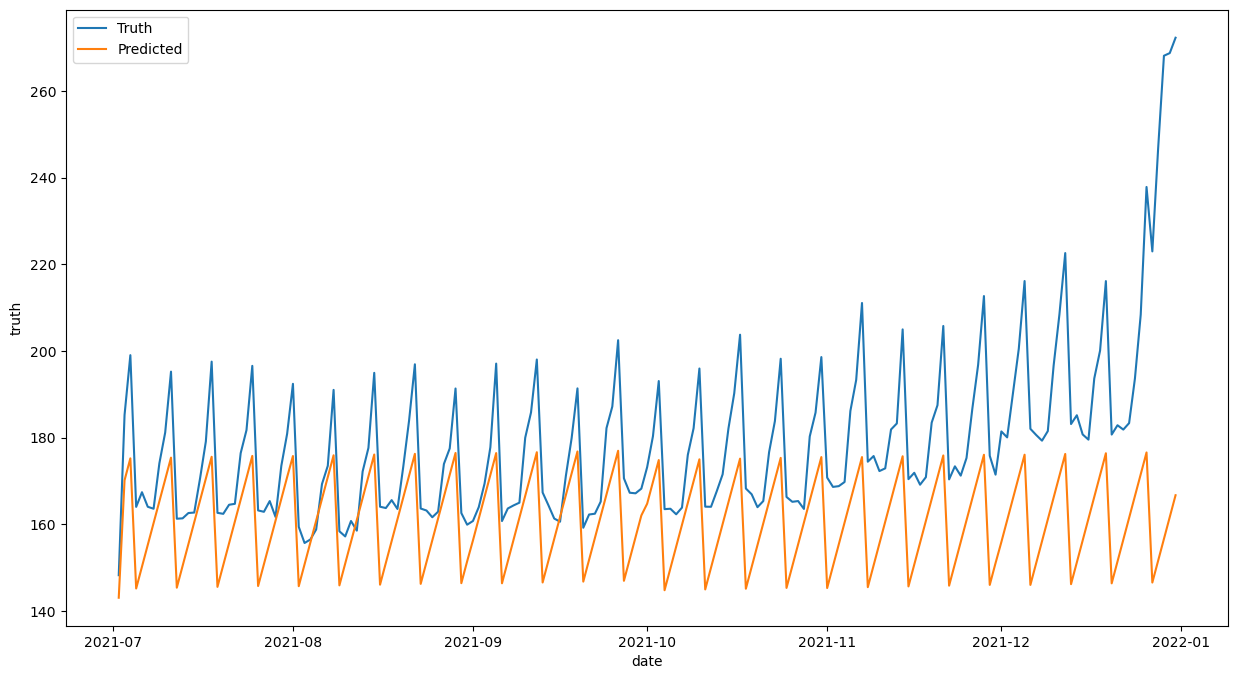

In [50]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='truth', data=res, ci=None, label='Truth')
sns.lineplot(x='date', y='predicted', data=res, ci=None, label='Predicted')
plt.legend()

# MODELS WITH ONE WEEK LAG

In [15]:
no_lags = 7
df = clreate_lags_by_group(data, lags=no_lags)
df = prepare_data(df, train_flag=True)
train_x, train_y, test_x, test_y = train_test_split(df)

In [52]:
train_x.head()

,country,store,product,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,year,month,quarter,week,day,covid_flag
date,,,,,,,,,,,,,,,,
2017-01-08,1,2,3,200.0,221.0,214.0,224.0,222.0,252.0,268.0,2017,1,1,6,8,0
2017-01-08,0,2,1,66.0,64.0,61.0,66.0,68.0,77.0,98.0,2017,1,1,6,8,0
2017-01-08,1,0,2,121.0,142.0,134.0,122.0,135.0,141.0,166.0,2017,1,1,6,8,0
2017-01-08,2,0,4,267.0,259.0,254.0,251.0,289.0,286.0,383.0,2017,1,1,6,8,0
2017-01-08,0,0,2,35.0,36.0,38.0,34.0,35.0,52.0,53.0,2017,1,1,6,8,0


In [54]:
test_x.head()

,country,store,product,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,year,month,quarter,week,day,covid_flag
date,,,,,,,,,,,,,,,,
2021-07-03,0,2,0,47.0,41.0,42.0,44.0,43.0,57.0,55.0,2021,7,3,5,3,1
2021-07-03,4,2,3,101.0,84.0,81.0,90.0,95.0,102.0,99.0,2021,7,3,5,3,1
2021-07-03,1,0,1,780.0,751.0,696.0,658.0,742.0,864.0,881.0,2021,7,3,5,3,1
2021-07-03,0,0,2,25.0,22.0,23.0,23.0,25.0,29.0,28.0,2021,7,3,5,3,1
2021-07-03,3,2,3,128.0,116.0,108.0,116.0,108.0,132.0,133.0,2021,7,3,5,3,1


In [55]:
# Create the XGBRegressor model
xgb_model_lagged = XGBRegressor()

# Fit the model to the data
xgb_model_lagged.fit(train_x.values, train_y.values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [56]:
y_pred = xgb_model_lagged.predict(test_x)
mse_value = mean_squared_error(y_pred, test_y)
res = pd.DataFrame(zip(map(int,y_pred),test_y.values), columns=["predicted", "truth"])
res['date'] = test_y.index
print(f"MSE: {mse_value}")
res.head(10)

MSE: 378.852290634637


,predicted,truth,date
0,52,48,2021-07-03
1,99,103,2021-07-03
2,840,886,2021-07-03
3,25,26,2021-07-03
4,127,136,2021-07-03
5,7,7,2021-07-03
6,31,29,2021-07-03
7,101,94,2021-07-03
8,633,704,2021-07-03
9,130,118,2021-07-03


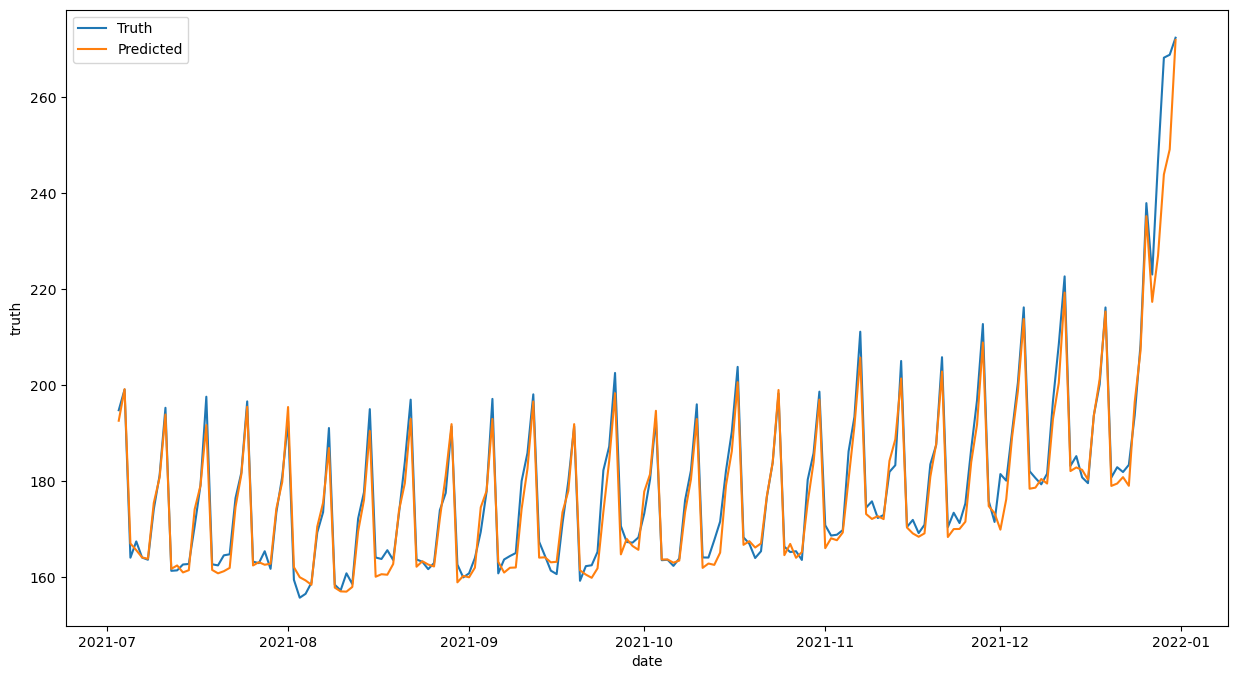

In [57]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='truth', data=res, ci=None, label='Truth')
sns.lineplot(x='date', y='predicted', data=res, ci=None, label='Predicted')
plt.legend()

In [58]:
from catboost import CatBoostRegressor
# Create the XGBRegressor model
cat_model_lagged = CatBoostRegressor(silent=True)

# Fit the model to the data
cat_model_lagged.fit(train_x, train_y)

In [59]:
y_pred = cat_model_lagged.predict(test_x)
mse_value = mean_squared_error(y_pred, test_y)
res = pd.DataFrame(zip(map(int,y_pred),test_y.values), columns=["predicted", "truth"])
res['date'] = test_y.index
print(f"MSE: {mse_value}")
res.head(10)

MSE: 349.9377432436366


,predicted,truth,date
0,49,48,2021-07-03
1,98,103,2021-07-03
2,813,886,2021-07-03
3,27,26,2021-07-03
4,130,136,2021-07-03
5,7,7,2021-07-03
6,28,29,2021-07-03
7,100,94,2021-07-03
8,633,704,2021-07-03
9,125,118,2021-07-03


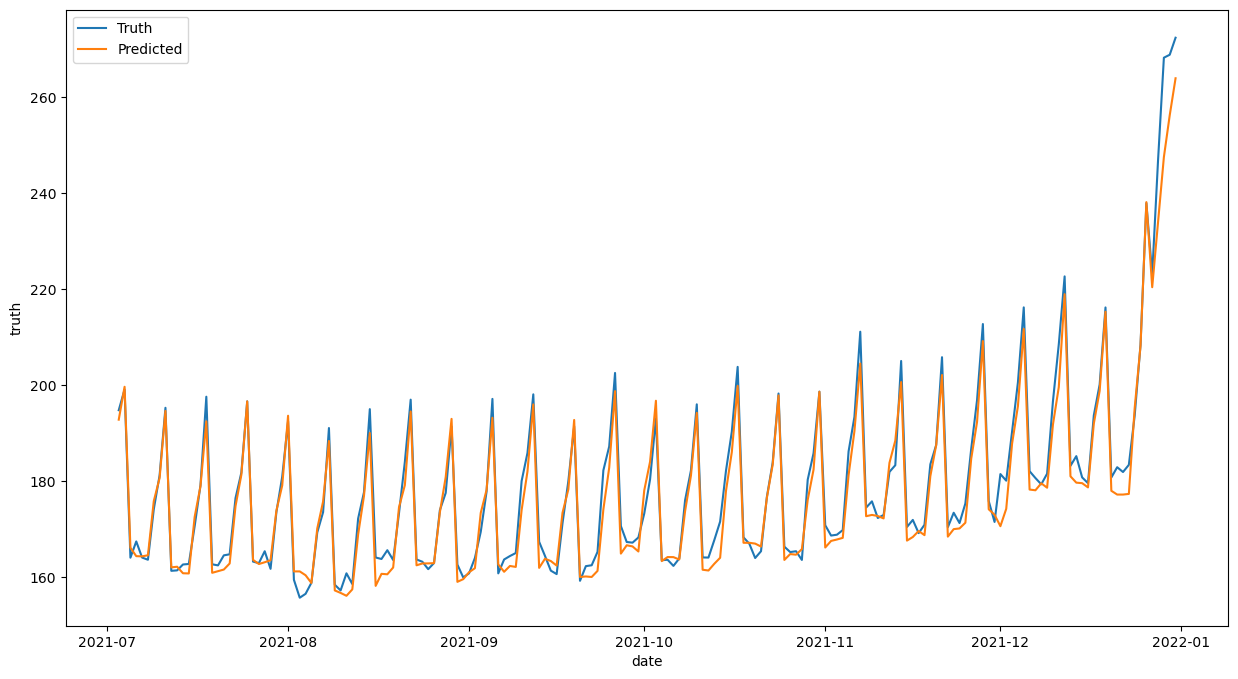

In [60]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='truth', data=res, ci=None, label='Truth')
sns.lineplot(x='date', y='predicted', data=res, ci=None, label='Predicted')
plt.legend()

# Parameter tunning catboost

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to tune
params = {
    'iterations': [1000, 2000, 3000,4000],
    'depth': [5, 7,9,11],
}

# Create a grid search object
cat_model_lagged = CatBoostRegressor(silent=True)

grid_search = GridSearchCV(estimator=cat_model_lagged, param_grid=params, cv=5)
grid_search.fit(train_x.values, train_y.values)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
cat_model_lagged = CatBoostRegressor(silent=True, depth= 7, iterations= 3000, learning_rate=.009)

# Fit the model to the data
cat_model_lagged.fit(train_x, train_y)

In [ ]:
y_pred = cat_model_lagged.predict(test_x)
mse_value = mean_squared_error(y_pred, test_y)
res = pd.DataFrame(zip(map(int,y_pred),test_y.values), columns=["predicted", "truth"])
print(f"MSE: {mse_value}")
res.head(10)

# SO FAR WE CREATED LAG FIRST AND THEN DEVIDED THE DATA IN TRAIN and TEST, BUT WITH test FILE WE DO NOT HAVE THIS LAG INFORMATION AVAILABLE IN ADVANCE

# SO NOW WE FIRST MAKE PREDICTION AND THEN USE IT TO MAKE ANOTHER PREDICTION BY MAKE IT A LAG VARIABLE

In [16]:
def create_lags_for_prediction (row, predictions,no_lags): 
    for i in range(no_lags):
        row['lag_{}'.format(i+1)] = predictions[-(i+1)]   
    return row

In [17]:
def predict_group(model, data,initial_list, no_lags, result, cols):
    predictions = initial_list.copy()
    for i in range(len(data)):
        row = data.iloc[i]
        row = create_lags_for_prediction(row,predictions,no_lags)
        row = row[cols]
        y_pred = model.predict([row])[0]
        predictions.append(y_pred)
    res = pd.DataFrame(zip(result,predictions[len(initial_list):]), columns=['id', 'predicted_num_sold'])
    res.index = result.index
    return res

In [18]:
def predict(model,data,train_data,cols,no_lags):
    data = prepare_data(data)
    #train_data = prepare_data(train_data)
    countries = list(set(data['country']))
    stores = list(set(data['store']))
    products = list(set(data['product']))
    final_data = pd.DataFrame()
    for country in countries:
        for product in products:
            for store in stores:
                temp = data[(data['country'] == country) & (data['store'] == store) & (data['product'] == product)]
                initial_list = list(train_data[(train_data['country'] == country) & (train_data['store'] == store) & (train_data['product'] == product)]['num_sold'])[-no_lags:]
                temp = predict_group(model, temp.drop(['id'], axis=1), initial_list, no_lags, temp['id'], cols)          
                final_data = pd.concat([final_data,temp], axis=0)
                print(final_data.shape, end="")             
    return final_data

In [19]:
no_lags = 7
train_x, train_y, test_x, test_y = train_test_split(data)
train = clreate_lags_by_group(pd.concat([train_x,train_y], axis=1), lags=no_lags)
train = prepare_data(train, train_flag=True)
train_x = train.drop(['num_sold'], axis=1)
train_y = train['num_sold']

In [64]:
train_x.head()

,country,store,product,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,year,month,quarter,week,day,covid_flag
date,,,,,,,,,,,,,,,,
2017-01-08,2,1,2,8.0,9.0,9.0,9.0,10.0,10.0,14.0,2017,1,1,6,8,0
2017-01-08,2,1,0,60.0,60.0,60.0,64.0,64.0,63.0,92.0,2017,1,1,6,8,0
2017-01-08,4,0,3,495.0,452.0,444.0,435.0,509.0,481.0,673.0,2017,1,1,6,8,0
2017-01-08,4,0,0,429.0,450.0,469.0,524.0,499.0,541.0,724.0,2017,1,1,6,8,0
2017-01-08,4,1,0,85.0,80.0,80.0,79.0,85.0,106.0,122.0,2017,1,1,6,8,0


In [65]:
test_x.head()

,id,date,country,store,product
123255,123255,2021-07-02,Estonia,Kaggle Learn,Using LLMs to Improve Your Coding
123256,123256,2021-07-02,Estonia,Kaggle Learn,Using LLMs to Train More LLMs
123257,123257,2021-07-02,Estonia,Kaggle Learn,Using LLMs to Win Friends and Influence People
123258,123258,2021-07-02,Estonia,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
123259,123259,2021-07-02,Estonia,Kaggle Learn,Using LLMs to Write Better


In [66]:
# Create the XGBRegressor model
xgb_model_lagged = XGBRegressor()

# Fit the model to the data
xgb_model_lagged.fit(train_x.values, train_y.values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
pred = predict(xgb_model_lagged, test_x, pd.concat([train_x,train_y],axis=1),train_x.columns, no_lags)

(182, 2)(364, 2)(546, 2)(728, 2)(910, 2)(1092, 2)(1274, 2)(1456, 2)(1638, 2)(1820, 2)(2002, 2)(2184, 2)(2366, 2)(2548, 2)(2730, 2)(2912, 2)(3094, 2)(3276, 2)(3458, 2)(3640, 2)(3822, 2)(4004, 2)(4186, 2)(4368, 2)(4550, 2)(4732, 2)(4914, 2)(5096, 2)(5278, 2)(5460, 2)(5643, 2)(5826, 2)(6009, 2)(6192, 2)(6375, 2)(6558, 2)(6741, 2)(6924, 2)(7107, 2)(7290, 2)(7473, 2)(7656, 2)(7839, 2)(8022, 2)(8205, 2)(8388, 2)(8571, 2)(8754, 2)(8937, 2)(9120, 2)(9303, 2)(9486, 2)(9669, 2)(9852, 2)(10035, 2)(10218, 2)(10401, 2)(10584, 2)(10767, 2)(10950, 2)(11133, 2)(11316, 2)(11499, 2)(11682, 2)(11865, 2)(12048, 2)(12231, 2)(12414, 2)(12597, 2)(12780, 2)(12963, 2)(13146, 2)(13329, 2)(13512, 2)(13695, 2)

In [72]:
df_merged = test_x.merge(pred, on='id', how='inner')
df_merged['true_num_sold'] = test_y.values

mse_value = mean_squared_error(df_merged['true_num_sold'], df_merged['predicted_num_sold'])
print("MSE:", mse_value)
df_merged[['date','true_num_sold','predicted_num_sold']].head(5)

MSE: 1974.1908786475817


,date,true_num_sold,predicted_num_sold
0,2021-07-02,80,82.430946
1,2021-07-02,69,75.015305
2,2021-07-02,12,11.979699
3,2021-07-02,57,56.169891
4,2021-07-02,60,62.973412


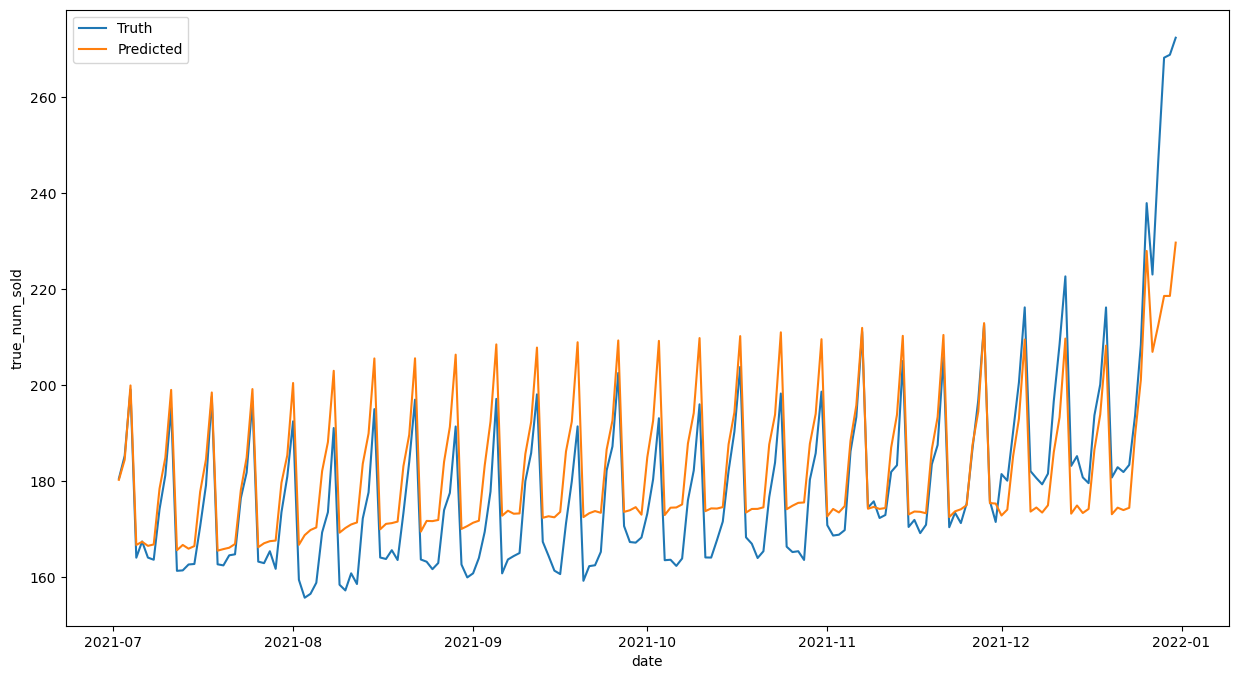

In [73]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='true_num_sold', data=df_merged, ci=None, label='Truth')
sns.lineplot(x='date', y='predicted_num_sold', data=df_merged, ci=None, label='Predicted')
plt.legend()

In [74]:
def calculate_smape(true_values, predicted_values):
    smape = np.mean(2 * abs(true_values - predicted_values) / (abs(true_values) + abs(predicted_values))) * 100
    return(smape)

In [75]:
calculate_smape(df_merged['true_num_sold'],df_merged['predicted_num_sold'])

12.871227703237423

In [76]:
from catboost import CatBoostRegressor
# Create the XGBRegressor model
cat_model_lagged = CatBoostRegressor(silent=True, depth= 7, iterations= 3000, learning_rate=.009)

# Fit the model to the data
cat_model_lagged.fit(train_x.values, train_y.values)

pred = predict(cat_model_lagged, test_x, pd.concat([train_x,train_y],axis=1),train_x.columns, no_lags)

(182, 2)(364, 2)(546, 2)(728, 2)(910, 2)(1092, 2)(1274, 2)(1456, 2)(1638, 2)(1820, 2)(2002, 2)(2184, 2)(2366, 2)(2548, 2)(2730, 2)(2912, 2)(3094, 2)(3276, 2)(3458, 2)(3640, 2)(3822, 2)(4004, 2)(4186, 2)(4368, 2)(4550, 2)(4732, 2)(4914, 2)(5096, 2)(5278, 2)(5460, 2)(5643, 2)(5826, 2)(6009, 2)(6192, 2)(6375, 2)(6558, 2)(6741, 2)(6924, 2)(7107, 2)(7290, 2)(7473, 2)(7656, 2)(7839, 2)(8022, 2)(8205, 2)(8388, 2)(8571, 2)(8754, 2)(8937, 2)(9120, 2)(9303, 2)(9486, 2)(9669, 2)(9852, 2)(10035, 2)(10218, 2)(10401, 2)(10584, 2)(10767, 2)(10950, 2)(11133, 2)(11316, 2)(11499, 2)(11682, 2)(11865, 2)(12048, 2)(12231, 2)(12414, 2)(12597, 2)(12780, 2)(12963, 2)(13146, 2)(13329, 2)(13512, 2)(13695, 2)

In [77]:
df_merged = test_x.merge(pred, on='id', how='inner')
df_merged['true_num_sold'] = test_y.values

mse_value = mean_squared_error(df_merged['true_num_sold'], df_merged['predicted_num_sold'])
print("MSE:", mse_value)
df_merged[['date','true_num_sold','predicted_num_sold']].head(5)

MSE: 1497.5381759267582


,date,true_num_sold,predicted_num_sold
0,2021-07-02,80,85.342880
1,2021-07-02,69,79.334187
2,2021-07-02,12,11.852361
3,2021-07-02,57,60.593044
4,2021-07-02,60,66.916824


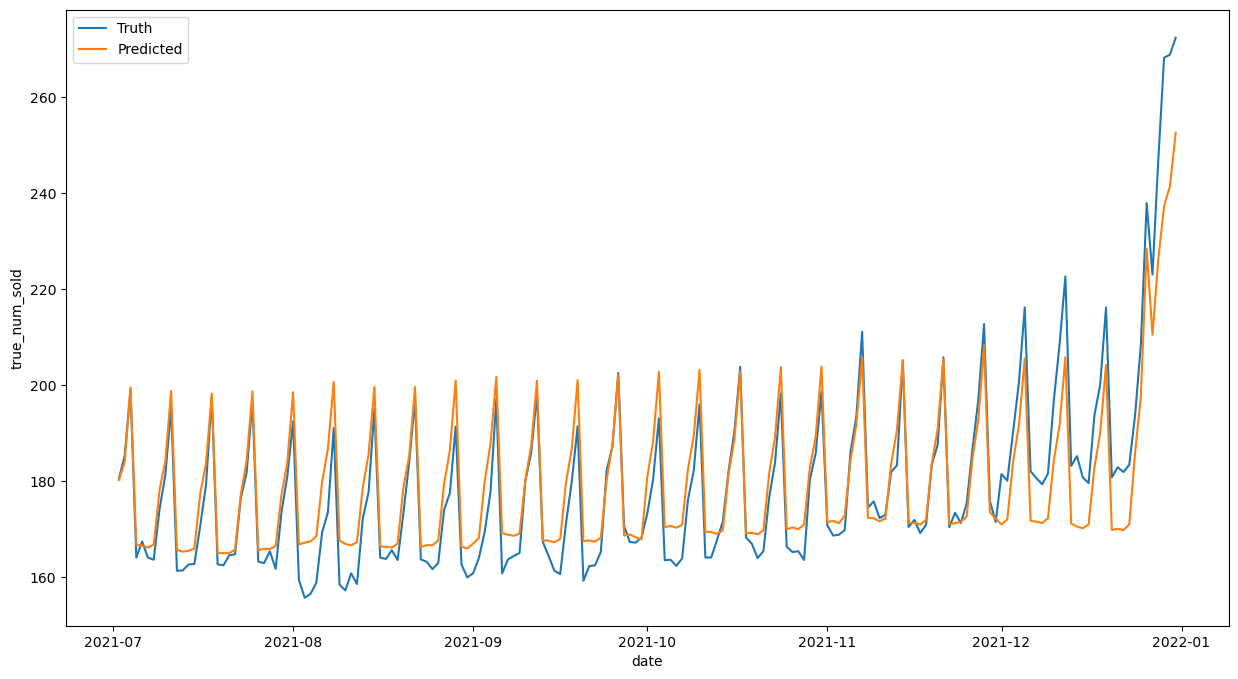

In [78]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='true_num_sold', data=df_merged, ci=None, label='Truth')
sns.lineplot(x='date', y='predicted_num_sold', data=df_merged, ci=None, label='Predicted')
plt.legend()

In [79]:
calculate_smape(df_merged['true_num_sold'],df_merged['predicted_num_sold'])

13.476498608442794

# LAG OF 365 DAYS

In [ ]:
no_lags = 365
train_x, train_y, test_x, test_y = train_test_split(data)
train = clreate_lags_by_group(pd.concat([train_x,train_y], axis=1), lags=no_lags)
train = prepare_data(train, train_flag=True)
train_x = train.drop(['num_sold'], axis=1)
train_y = train['num_sold']

In [ ]:
from catboost import CatBoostRegressor
# Create the XGBRegressor model
cat_model_lagged = CatBoostRegressor(silent=True, depth= 7, iterations= 3000, learning_rate=.009)

# Fit the model to the data
cat_model_lagged.fit(train_x.values, train_y.values)

pred = predict(cat_model_lagged, test_x, pd.concat([train_x,train_y],axis=1),train_x.columns, no_lags)

In [ ]:
df_merged = test_x.merge(pred, on='id', how='inner')
df_merged['true_num_sold'] = test_y.values

mse_value = mean_squared_error(df_merged['true_num_sold'], df_merged['predicted_num_sold'])
print("MSE:", mse_value)
df_merged[['date','true_num_sold','predicted_num_sold']].head(5)

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='true_num_sold', data=df_merged, ci=None, label='Truth')
sns.lineplot(x='date', y='predicted_num_sold', data=df_merged, ci=None, label='Predicted')
plt.legend()

# Final Prediction on whole data

In [20]:
no_lags = 7
train = clreate_lags_by_group(data, lags=no_lags)
train = prepare_data(train, train_flag=True)
train_x = train.drop(['num_sold'], axis=1)
train_y = train['num_sold']

In [ ]:
# Create the XGBRegressor model
xgb_model_lagged = XGBRegressor()

# Fit the model to the data
xgb_model_lagged.fit(train_x.values, train_y.values)

In [ ]:
xgb_submission = predict(xgb_model_lagged, test, pd.concat([train_x,train_y],axis=1),train_x.columns, no_lags)

In [ ]:
xgb_submission_merged = test.merge(xgb_submission, on='id', how='inner')
xgb_submission_merged = xgb_submission_merged[['id', 'num_sold']]

In [ ]:
xgb_submission_merged.to_csv("submission.csv", index=False)

In [28]:
from catboost import CatBoostRegressor
# Create the XGBRegressor model
cat_model_lagged = CatBoostRegressor(silent=True)

# Fit the model to the data
cat_model_lagged.fit(train_x.values, train_y.values)

cat_boost_submission = predict(cat_model_lagged, test, pd.concat([train_x,train_y],axis=1),train_x.columns, no_lags)

(365, 2)(730, 2)(1095, 2)(1460, 2)(1825, 2)(2190, 2)(2555, 2)(2920, 2)(3285, 2)(3650, 2)(4015, 2)(4380, 2)(4745, 2)(5110, 2)(5475, 2)(5840, 2)(6205, 2)(6570, 2)(6935, 2)(7300, 2)(7665, 2)(8030, 2)(8395, 2)(8760, 2)(9125, 2)(9490, 2)(9855, 2)(10220, 2)(10585, 2)(10950, 2)(11315, 2)(11680, 2)(12045, 2)(12410, 2)(12775, 2)(13140, 2)(13505, 2)(13870, 2)(14235, 2)(14600, 2)(14965, 2)(15330, 2)(15695, 2)(16060, 2)(16425, 2)(16790, 2)(17155, 2)(17520, 2)(17885, 2)(18250, 2)(18615, 2)(18980, 2)(19345, 2)(19710, 2)(20075, 2)(20440, 2)(20805, 2)(21170, 2)(21535, 2)(21900, 2)(22265, 2)(22630, 2)(22995, 2)(23360, 2)(23725, 2)(24090, 2)(24455, 2)(24820, 2)(25185, 2)(25550, 2)(25915, 2)(26280, 2)(26645, 2)(27010, 2)(27375, 2)

In [29]:
cat_boost_submission_merged = test.merge(cat_boost_submission, on='id', how='inner')
cat_boost_submission_merged.head()

,id,date,country,store,product,predicted_num_sold
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,45.983310
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,44.834047
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,8.162708
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,44.599214
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,38.479885


In [30]:
cat_boost_submission_merged['num_sold'] = cat_boost_submission_merged['predicted_num_sold']

In [32]:
cat_boost_submission_merged = cat_boost_submission_merged[['id', 'num_sold']]
cat_boost_submission_merged.to_csv('submission.csv', index=False)

# Future plan is to use ARIMA, SARIMAX and FB Prophet, but for now above is the final submitted file. Ignore following code

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
int_data = data[(data['country']=='Argentina') & (data['store']=='Kaggle Learn') &  (data['product']=='Using LLMs to Improve Your Coding')]['num_sold']

adfuller(int_data)

int_data = data[(data['country']=='Argentina') & (data['store']=='Kaggle Learn') &  (data['product']=='Using LLMs to Improve Your Coding')]['num_sold'].diff().dropna()
fig,ax = plt.subplots(1,2, figsize=(15,5))
plot_acf(int_data, ax=ax[0], lags=80)
plot_pacf(int_data, ax=ax[1], lags=80)

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(train.index,train)
plt.plot(test.index,test)
#plt.plot(model_fit.fittedvalues.index,model_fit.fittedvalues)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train, lags=365)
model_fit = model.fit()

In [ ]:
test.index[0]

In [ ]:
import datetime
start = test.index[0]
end = test.index[-1]

print(start, end)
predicted = model_fit.predict(start,end)

In [ ]:
start_week = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
end_week = datetime.datetime.strptime('2017-06-30','%Y-%m-%d')
print(train[start_week:end_week].mean())

start_week = datetime.datetime.strptime('2018-01-01','%Y-%m-%d')
end_week = datetime.datetime.strptime('2018-06-30','%Y-%m-%d')
print(train[start_week:end_week].mean())

start_week = datetime.datetime.strptime('2019-01-01','%Y-%m-%d')
end_week = datetime.datetime.strptime('2019-06-30','%Y-%m-%d')
print(train[start_week:end_week].mean())

start_week = datetime.datetime.strptime('2020-01-01','%Y-%m-%d')
end_week = datetime.datetime.strptime('2020-06-30','%Y-%m-%d')
print(train[start_week:end_week].mean())

start_week = datetime.datetime.strptime('2021-01-01','%Y-%m-%d')
end_week = datetime.datetime.strptime('2021-06-30','%Y-%m-%d')
print(test[start_week:end_week].mean())

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(train.index,train)
plt.plot(test.index,test)
plt.plot(model_fit.fittedvalues.index,model_fit.fittedvalues)
plt.plot(predicted)

In [ ]:
from statsmodels.tsa.stattools import adfuller
int_data = data[(data['country']=='Argentina') & (data['store']=='Kaggle Learn') &  (data['product']=='Using LLMs to Improve Your Coding')]['num_sold']

adfuller(int_data)

In [ ]:
int_data = data[(data['country']=='Argentina') & (data['store']=='Kaggle Learn') &  (data['product']=='Using LLMs to Improve Your Coding')]['num_sold'].diff().dropna()
fig,ax = plt.subplots(1,2, figsize=(15,5))
plot_acf(int_data, ax=ax[0], lags=80)
plot_pacf(int_data, ax=ax[1], lags=80)


In [ ]:
int_data

In [ ]:
train_limit = int(len(int_data)*.90)
#train_limit = -30
train_data = int_data.set_index('date')['num_sold'][:train_limit]
test_data = int_data.set_index('date')['num_sold'][train_limit:]

In [ ]:
test_data

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit an AR model
model = AutoReg(train_data, lags=7)
model_fit = model.fit()

# Print the model coefficients
print(model_fit.params)

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(train_data.index,train_data)
plt.plot(test_data.index,test_data)
plt.plot(model_fit.fittedvalues.index,model_fit.fittedvalues)

In [ ]:
import datetime
# start = datetime.datetime.strptime(test_data.index[0],'%Y-%m-%d')
# end = datetime.datetime.strptime(test_data.index[-1],'%Y-%m-%d')


start = test_data.index[0]
end = test_data.index[-1]

print(start, end)
predicted = model_fit.predict(start,end)

In [ ]:
len(predicted), len(test_data)

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(test_data.values)
plt.plot(predicted.values)
plt.legend()

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
auto_model = auto_arima(train_data,start_p=14, d=0, start_q=12, max_p=60, max_d=2, max_q=30,
                        seasonal=False,stationary=True,trace=True,scoring ='mse',maxiter=100)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_arima_best = ARIMA(train_data,order = (15,1,1)).fit()

In [ ]:
from datetime import datetime
# make prediction
start_date = test_data.index[1]
end_date = test_data.index[-1]
prediction_arima_best = model_arima_best.predict(start_date,end_date)# stationary data

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(test_data.values)
plt.plot(prediction_arima_best.values)
plt.legend()

In [ ]:
import statsmodels.api as sm

In [ ]:
sarime_model=sm.tsa.statespace.SARIMAX(train_data,order=(7, 1, 1),seasonal_order=(7,1,1,15))
results=sarime_model.fit()

In [ ]:
start_date = test_data.index[1]
end_date = test_data.index[-1]
prediction_sarime = results.predict(start_date,end_date)# stationary data

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(test_data.values)
plt.plot(prediction_sarime.values)
plt.legend()